In [2]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


# Data Visualisation

  Sequence_Name   mcg   gvh   alm   mit  erl  pox   vac   nuc  \
0    ADT1_YEAST  0.58  0.61  0.47  0.13  0.5  0.0  0.48  0.22   
1    ADT2_YEAST  0.43  0.67  0.48  0.27  0.5  0.0  0.53  0.22   
2    ADT3_YEAST  0.64  0.62  0.49  0.15  0.5  0.0  0.53  0.22   
3    AAR2_YEAST  0.58  0.44  0.57  0.13  0.5  0.0  0.54  0.22   
4    AATM_YEAST  0.42  0.44  0.48  0.54  0.5  0.0  0.48  0.22   

  localization_site  
0               MIT  
1               MIT  
2               MIT  
3               NUC  
4               MIT  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1484 entries, 0 to 1483
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sequence_Name      1484 non-null   object 
 1   mcg                1484 non-null   float64
 2   gvh                1484 non-null   float64
 3   alm                1484 non-null   float64
 4   mit                1484 non-null   float64
 5   erl                1484 non-n

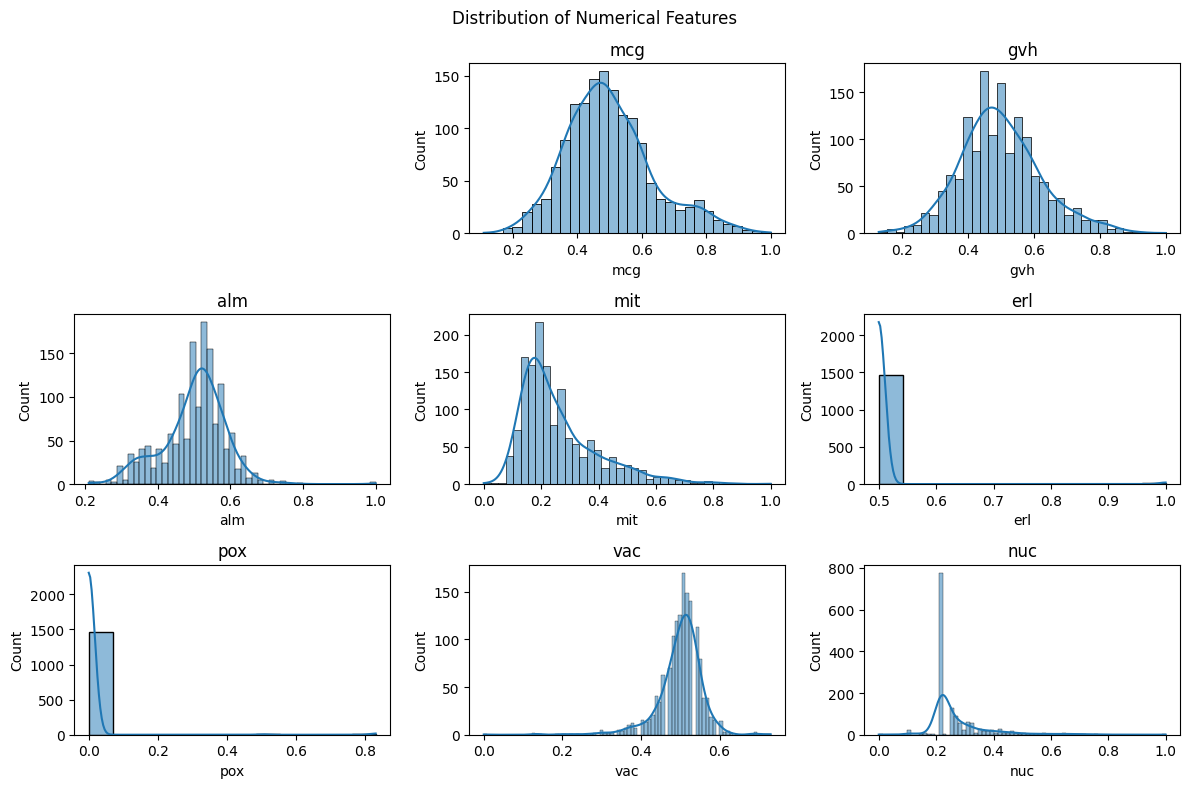

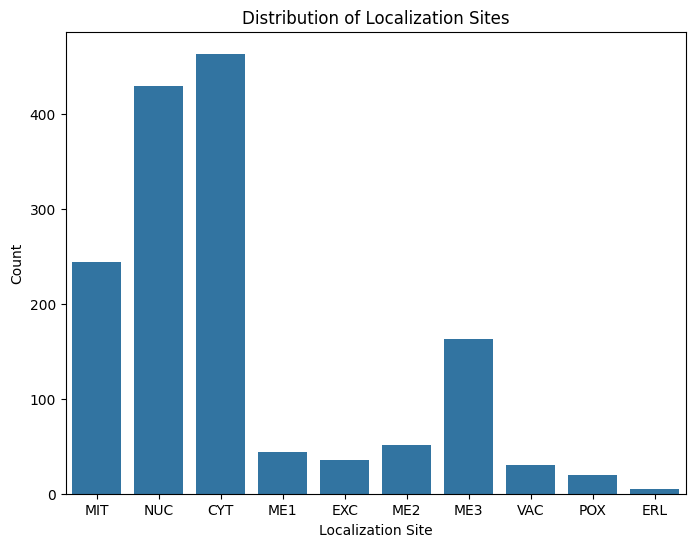

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo 
  
# Fetch dataset metadata
data_info = fetch_ucirepo(id=110)

# Load the actual dataset using the URL from metadata
data_url = data_info.metadata['data_url']
df = pd.read_csv(data_url)

# Explore the data
print(df.head())
print(df.info())


# Correct column names if needed
df.columns = ['Sequence_Name', 'mcg', 'gvh', 'alm', 'mit', 'erl', 'pox', 'vac', 'nuc', 'localization_site']


# Visualize the distribution of the numerical features
plt.figure(figsize=(12, 8))
for col in ['mcg', 'gvh', 'alm', 'mit', 'erl', 'pox', 'vac', 'nuc']:
    plt.subplot(3, 3, list(df.columns).index(col) + 1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.suptitle('Distribution of Numerical Features')
plt.tight_layout()
plt.show()

# Visualize the distribution of the localization sites
plt.figure(figsize=(8, 6))
sns.countplot(x='localization_site', data=df)
plt.title('Distribution of Localization Sites')
plt.xlabel('Localization Site')
plt.ylabel('Count')
plt.show()

<Figure size 1200x800 with 0 Axes>

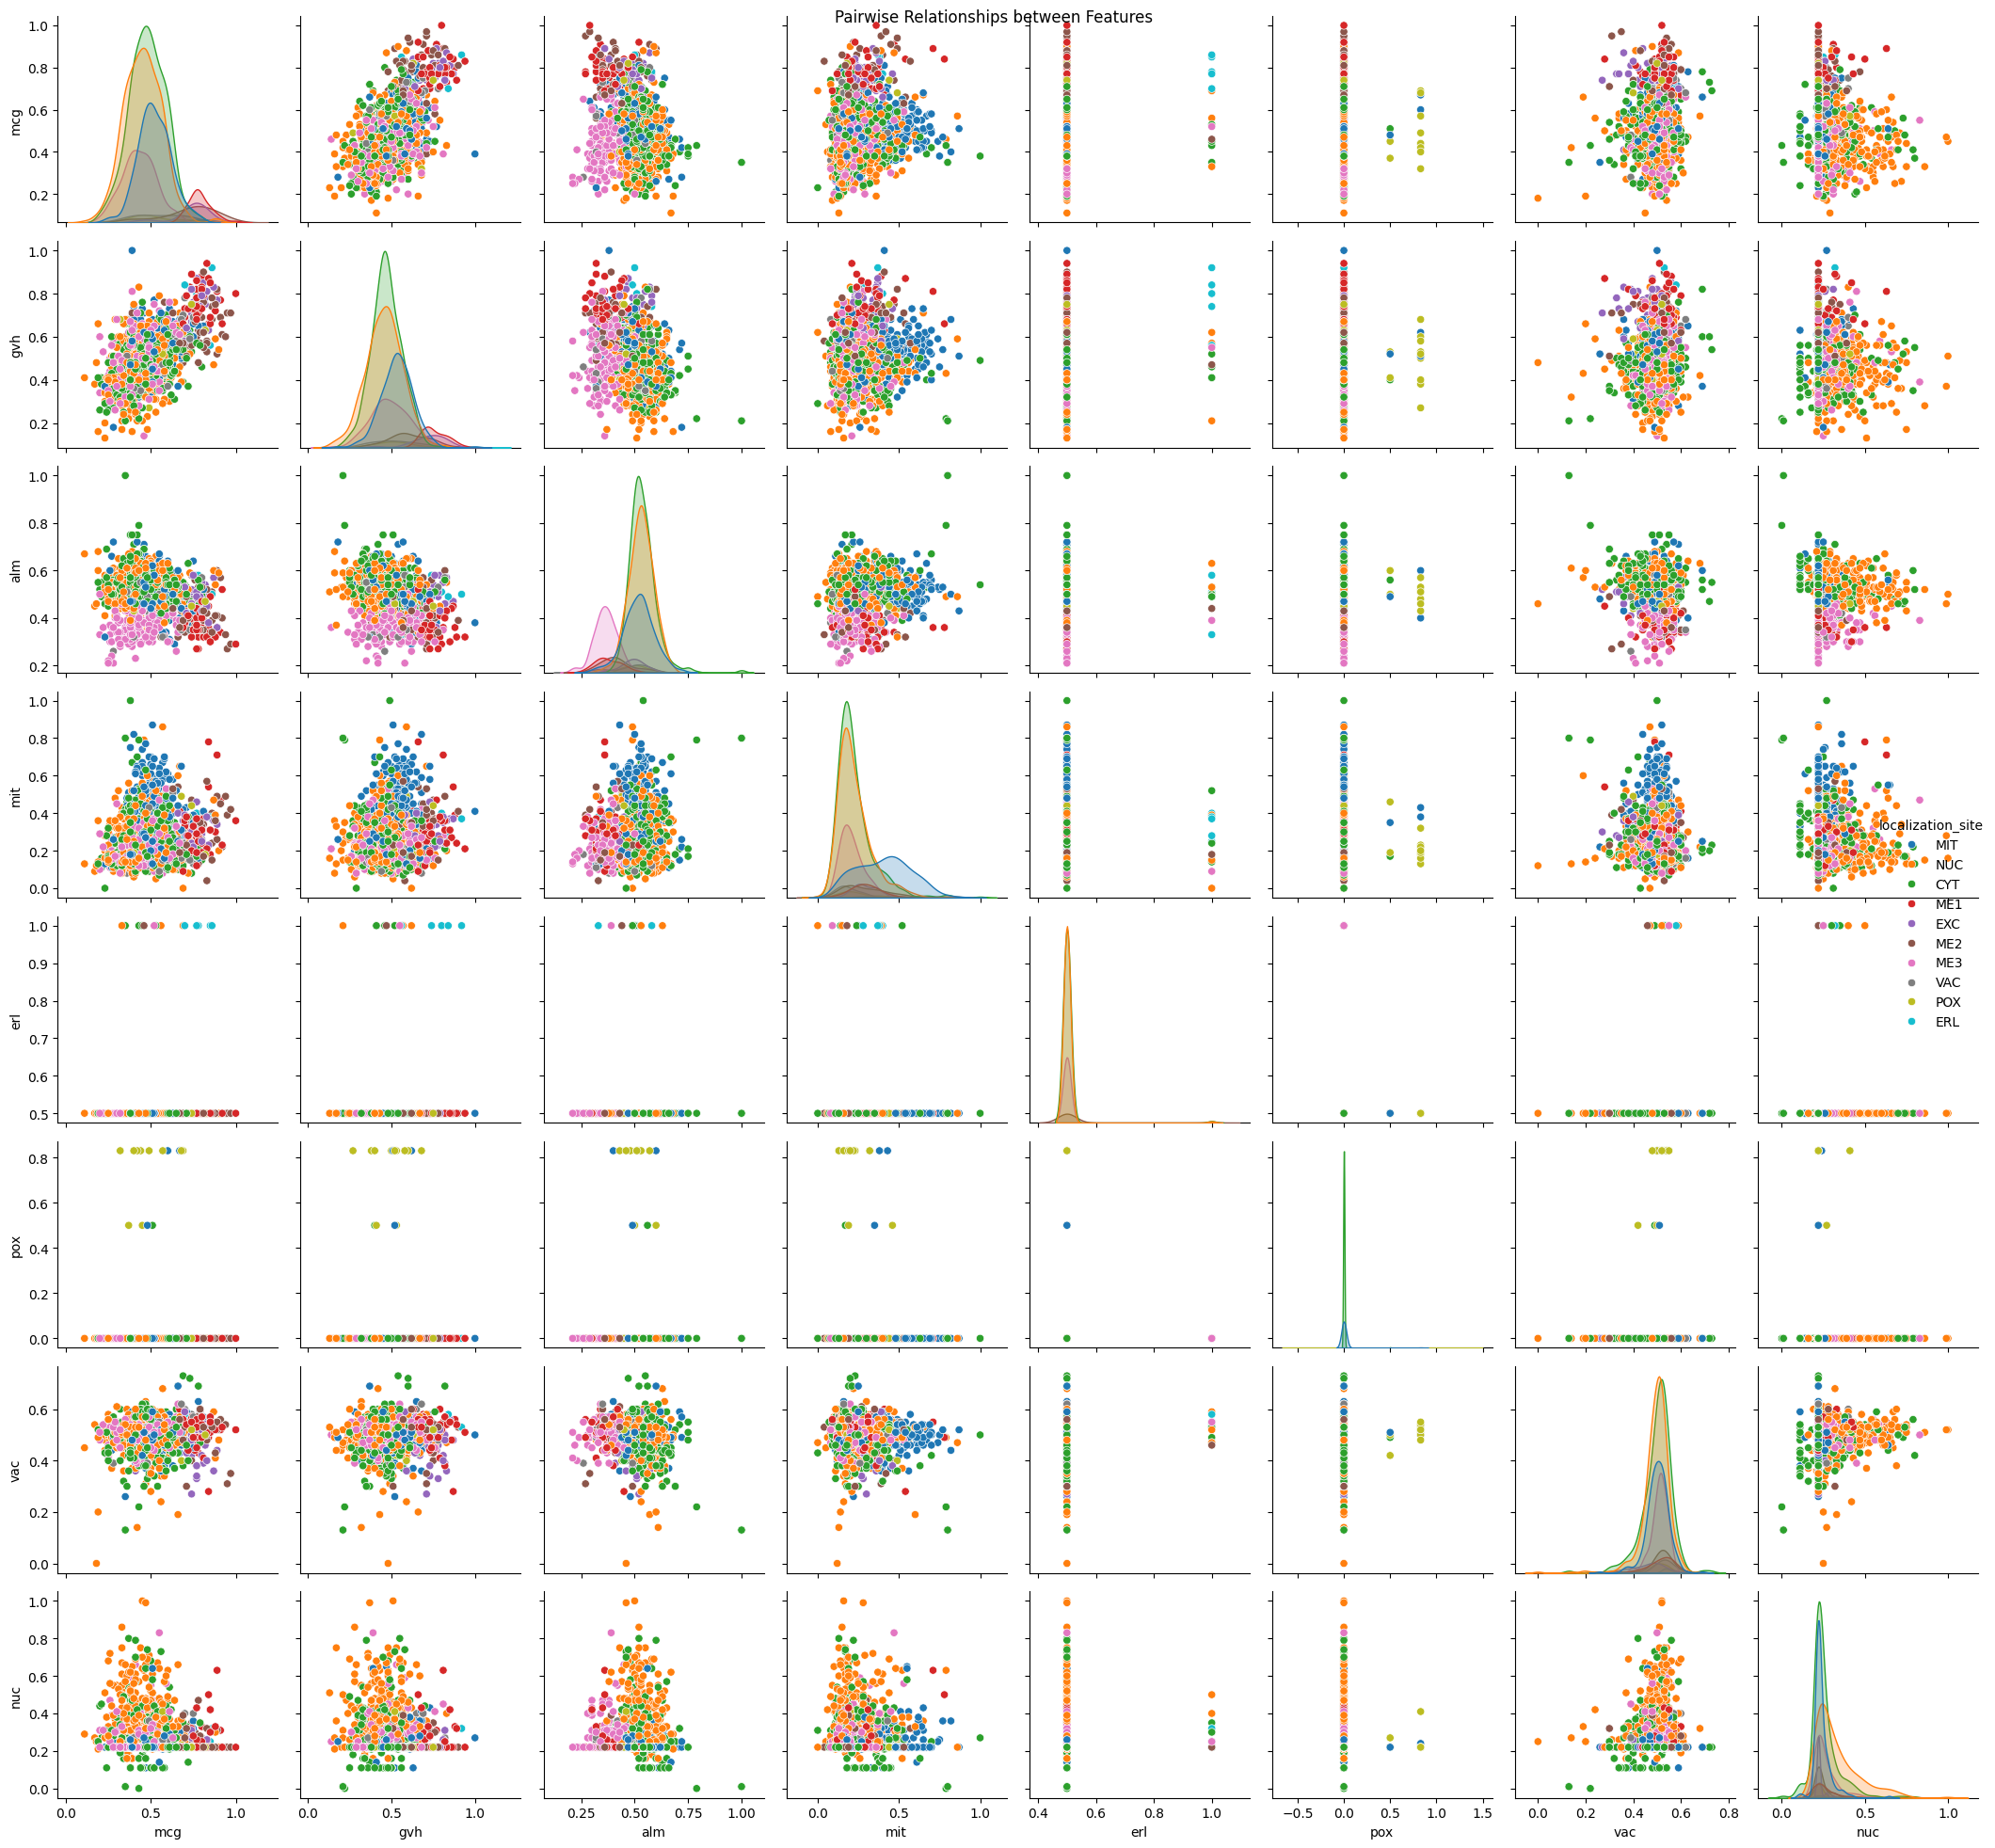

In [6]:
# Explore relationships between features
plt.figure(figsize=(12, 8))
sns.pairplot(df, hue='localization_site')
plt.suptitle('Pairwise Relationships between Features')
plt.tight_layout()
plt.show()

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from collections import Counter
from scipy.stats import uniform, randint
import time
import os

# Load Dataset

In [9]:
#Load the yeast dataset from GitHub

path = "."
    
filename = os.path.join(path,"yeast_data.csv")    
yeast_data = pd.read_csv(filename,na_values=['NA','?'])

print(yeast_data.head())

  Sequence_Name   mcg   gvh   alm   mit  erl  pox   vac   nuc  \
0    ADT1_YEAST  0.58  0.61  0.47  0.13  0.5  0.0  0.48  0.22   
1    ADT2_YEAST  0.43  0.67  0.48  0.27  0.5  0.0  0.53  0.22   
2    ADT3_YEAST  0.64  0.62  0.49  0.15  0.5  0.0  0.53  0.22   
3    AAR2_YEAST  0.58  0.44  0.57  0.13  0.5  0.0  0.54  0.22   
4    AATM_YEAST  0.42  0.44  0.48  0.54  0.5  0.0  0.48  0.22   

  Localization_Site  
0               MIT  
1               MIT  
2               MIT  
3               NUC  
4               MIT  


# Data Preprocessing

Out of the original 1484 data points, only 184 data points were classified into one of the 6 classes labelled ME2, ME1, EXC, VAC, POX and ERL. 

Most of the data points are classified into one of 4 classes labelled CYT, NUC, MIT and ME3. 

As such, we reduced the original dataset to 1300 data points, 8 features and 4 classes by removing the 6 classes with comparatively few instances and leaving only the 4 main classes with the mt data points.a.

<Figure size 800x600 with 0 Axes>

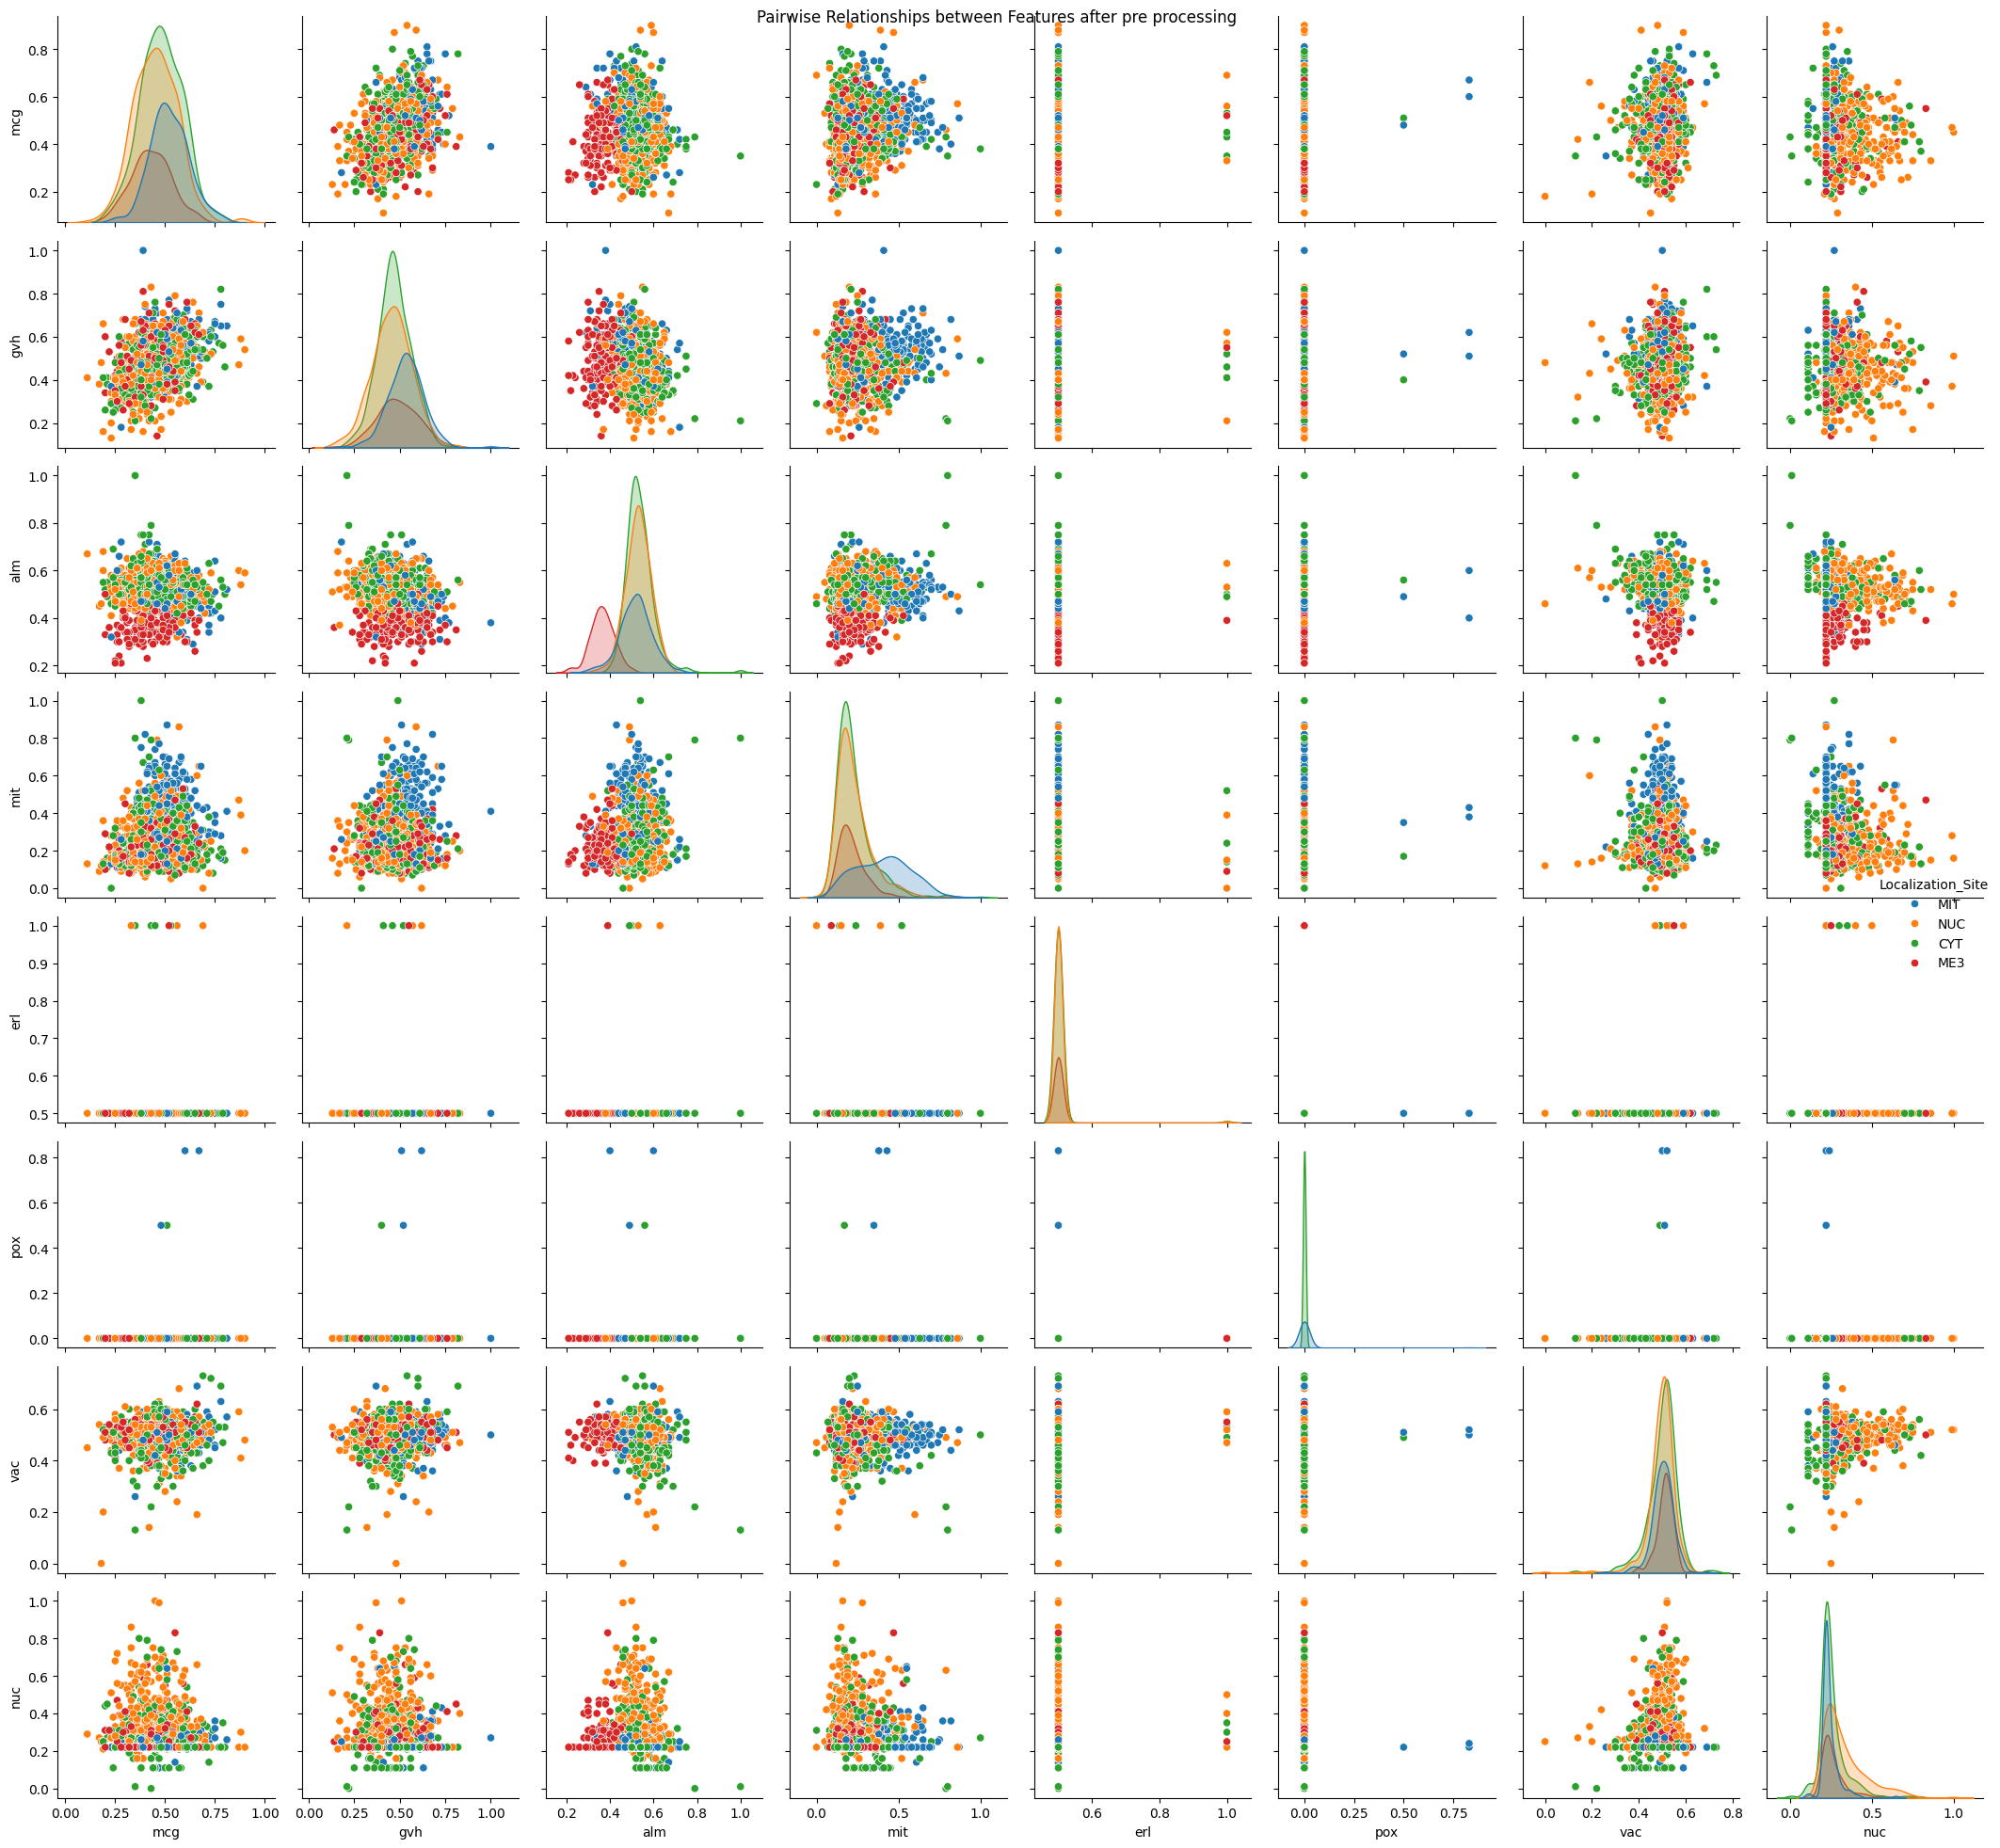

In [12]:
# Explore relationships between features after reducing the classes
plt.figure(figsize=(8, 6))
sns.pairplot(yeast_data, hue='Localization_Site')
plt.suptitle('Pairwise Relationships between Features after pre processing')
plt.tight_layout()
plt.show()

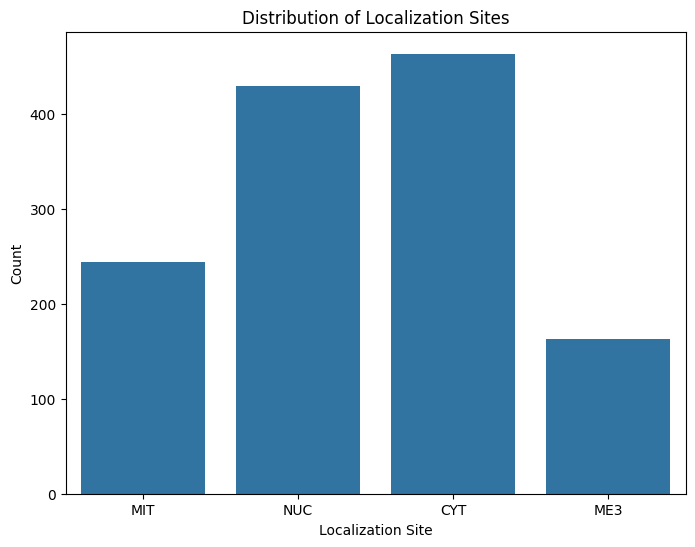

Print the first 5 datapoints and target values from the dataset seprately

 [[0.58 0.61 0.47 0.13 0.5  0.   0.48 0.22]
 [0.43 0.67 0.48 0.27 0.5  0.   0.53 0.22]
 [0.64 0.62 0.49 0.15 0.5  0.   0.53 0.22]
 [0.58 0.44 0.57 0.13 0.5  0.   0.54 0.22]
 [0.42 0.44 0.48 0.54 0.5  0.   0.48 0.22]] 

['MIT' 'MIT' 'MIT' 'NUC' 'MIT']

Target Names: ['CYT', 'ME3', 'MIT', 'NUC']
Feature Names: ['mcg', 'gvh', 'alm', 'mit', 'erl', 'pox', 'vac', 'nuc']
Data Shape: (1299, 8)
Target Shape: (1299,) 

First 5 in dataset (together):
   Sequence_Name   mcg   gvh   alm   mit  erl  pox   vac   nuc  \
0    ADT1_YEAST  0.58  0.61  0.47  0.13  0.5  0.0  0.48  0.22   
1    ADT2_YEAST  0.43  0.67  0.48  0.27  0.5  0.0  0.53  0.22   
2    ADT3_YEAST  0.64  0.62  0.49  0.15  0.5  0.0  0.53  0.22   
3    AAR2_YEAST  0.58  0.44  0.57  0.13  0.5  0.0  0.54  0.22   
4    AATM_YEAST  0.42  0.44  0.48  0.54  0.5  0.0  0.48  0.22   

  Localization_Site  
0               MIT  
1               MIT  
2               MIT  
3

In [13]:
# Visualize the distribution of the localization sites
plt.figure(figsize=(8, 6))
sns.countplot(x='Localization_Site', data=yeast_data)
plt.title('Distribution of Localization Sites')
plt.xlabel('Localization Site')
plt.ylabel('Count')
plt.show()

#Define features (X) and target variable (y)
X = yeast_data[['mcg', 'gvh', 'alm', 'mit', 'erl', 'pox', 'vac', 'nuc']].values
y = yeast_data['Localization_Site'].values

# Encode target labels to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
variety = label_encoder.classes_.tolist()  # List of class names

X2 = yeast_data[['mcg', 'gvh', 'alm', 'mit', 'erl', 'pox', 'vac', 'nuc']]
feature_names = X2.columns.tolist() #Feature names

#Print the first 5 data and target values from the dataset seprately
print("Print the first 5 datapoints and target values from the dataset seprately")
print("\n", X[:5], "\n")
print(y[:5])

print("\nTarget Names:", variety)
print("Feature Names:", feature_names)

print("Data Shape:", X.shape)
print("Target Shape:", y.shape, "\n")

print("First 5 in dataset (together):\n", yeast_data[:5])


# First split: 80% train ( + validation ), 20% test
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=51, stratify=y_encoded)

# Split training set into validation and reduced training set
X_validate, X_train = X_train_full[:130], X_train_full[130:]
y_validate, y_train = y_train_full[:130], y_train_full[130:]

#Print the train and test values
print("\n")
print("Print the shape of the training, validation and testing values (features and labels)")
print("Print the shape of the training features: ", X_train.shape)
print("Print the shape of the testing features: ", X_test.shape)
print("Print the shape of the validation features: ", X_validate.shape)
print("Print the shape of the training labels: ", y_train.shape)
print("Print the shape of the testing labels: ", y_test.shape)
print("Print the shape of the validation labels: ", y_validate.shape)

# Check class distribution in the training set
class_counts = Counter(y_train)
print("Original Class Distribution (training set):", class_counts)

# Standardize features for training, test, and validation sets
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_validate = scaler.transform(X_validate)

# SVM Model

Baseline SVM model trained successfully!

Baseline Accuracy on Training Set: 61.28%


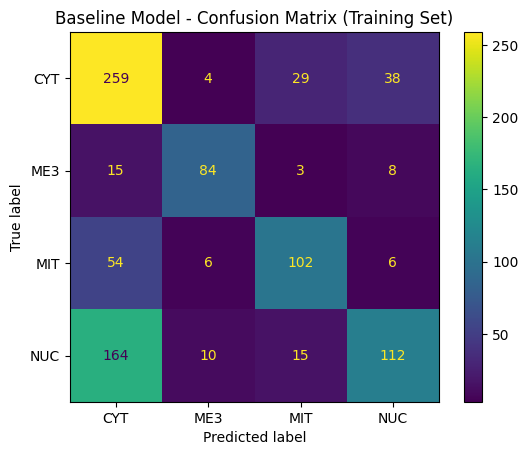

Baseline Accuracy on Validation Set: 61.54%


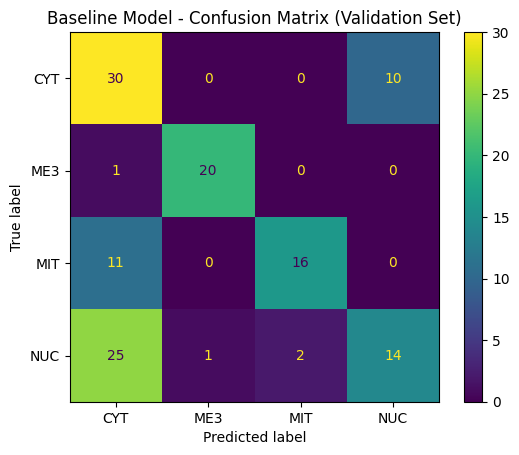

In [15]:
# SVM MODEL

# Baseline SVM Model

# Initialize and train the SVM model
svm_model_baseline = SVC(kernel='linear', decision_function_shape='ovo', random_state=42)
svm_model_baseline.fit(X_train, y_train)

print("Baseline SVM model trained successfully!")


# Predict on the validation set
y_predictor = svm_model_baseline.predict(X_validate) 

# Calculate and display the training set accuracy
train_pred_svm_model = svm_model_baseline.predict(X_train)
training_accuracy = accuracy_score(y_train, train_pred_svm_model)
print(f"\nBaseline Accuracy on Training Set: {training_accuracy * 100:.2f}%")

# Generate and plot confusion matrix for validation set
cm = confusion_matrix(y_train, train_pred_svm_model, labels=svm_model_baseline.classes_)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=variety)
cm_disp.plot()
plt.title("Baseline Model - Confusion Matrix (Training Set)")
plt.show() 

# Calculate and display the validation set accuracy
validation_accuracy_baseline = accuracy_score(y_validate, y_predictor)
print(f"Baseline Accuracy on Validation Set: {validation_accuracy_baseline * 100:.2f}%")

# Generate and plot confusion matrix for validation set
cm = confusion_matrix(y_validate, y_predictor, labels=svm_model_baseline.classes_)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=variety)
cm_disp.plot()
plt.title("Baseline Model - Confusion Matrix (Validation Set)")
plt.show()

# Hyperparameter tuning (SVM)

Hyperparameter Tuning with GridSearch 

In [18]:
# Retireve default parameters used on baseline model to decide on an appropriate range for the possible hyperparameter value combinations
default_params = svm_model_baseline.get_params()
print("\n", "These are the default hyperparameters used in the baseline SVM model:\n", default_params.items())

# Define parameter grids for GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100, 1000],
    'gamma': [0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf', 'poly'],
    'degree': [2, 3]  
}

param_grid2 = {
    'C': [0.0001, 0.001, 0.01, 0.1],
    'gamma': [0.01, 0.001, 0.0001],
    'kernel': ['poly','sigmoid'],
    'degree': [2, 4]  
}

param_grid3 = {
    'C': [1, 10, 100, 1000],
    'gamma': [0.01, 0.001, 0.0001],
    'kernel': ['linear', 'poly'],
    'degree': [2, 4]  
}

all_param_grids = [param_grid, param_grid2, param_grid3]

# Initialize StratifiedKFold for cross-validation
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

overfit_threshold = 0.05 

best_accuracy = 0
best_params_grid = None
best_grid = None

print("\n" + "=" * 50)
print("Starting GridSearchCV...")
print("=" * 50)

# Perform GridSearchCV for each parameter grid
for i, param in enumerate(all_param_grids):
    print(f"\nStarting GridSearchCV for Parameter Grid {i+1}")
    print("-" * 50)
    
    start_time = time.time()
    
    grid = GridSearchCV(SVC(), param, refit=True, cv=cv_strategy, verbose=1, n_jobs=-1)
    grid.fit(X_train, y_train) 
    
    # Calculate training accuracy
    train_pred_grid = grid.best_estimator_.predict(X_train)
    training_accuracy_grid = accuracy_score(y_train, train_pred_grid)
    print(f"Training Accuracy with Grid {i+1}:  {training_accuracy_grid * 100:.2f}%")
    
    # Evaluate on validation set
    best_model_grid = grid.best_estimator_
    y_validate_pred_grid = best_model_grid.predict(X_validate)
    validation_accuracy_grid = accuracy_score(y_validate, y_validate_pred_grid)
    
    print(f"\nValidation Accuracy with Grid {i+1}: {validation_accuracy_grid * 100:.2f}%")
    print(f"\nBest Parameters within Parameter Grid {i + 1}:", grid.best_params_) 
    
    # Calculate the difference between training and validation accuracy
    accuracy_difference = training_accuracy_grid - validation_accuracy_grid
    
    # Condition to select the best model:
    # 1. Higher validation accuracy
    # 2. Low accuracy difference (below threshold to avoid overfitting)
    if (validation_accuracy_grid > best_accuracy) and (accuracy_difference <= overfit_threshold):
        best_accuracy = validation_accuracy_grid
        best_params_grid = grid.best_params_
        best_grid = grid
    
    end_time = time.time()
    print(f"GridSearchCV for Grid {i+1} completed in {end_time - start_time:.2f} seconds")
    print("–" * 50) 
    
if best_accuracy > validation_accuracy_baseline:
    print()
    print("=" * 50)
    print(f"Best Grid Search Tuned Model Validation Accuracy: {best_accuracy * 100:.2f}%")
    print("This tuned model performs better than the baseline model!")
    print("\nThis is the combination of hyperparameters in best model optimized by GridSearchCV (i.e. best combination of hyperparameters across all Parameter Grids):\n", best_params_grid)
else:
    print() 
    print("=" * 50)
    print("The Grid Search tuned model did not outperform the baseline model.")
    print(f"Baseline Validation Accuracy: {validation_accuracy_baseline * 100:.2f}%")
    print(f"Best Tuned Model Accuracy: {best_accuracy * 100:.2f}%")


 These are the default hyperparameters used in the baseline SVM model:
 dict_items([('C', 1.0), ('break_ties', False), ('cache_size', 200), ('class_weight', None), ('coef0', 0.0), ('decision_function_shape', 'ovo'), ('degree', 3), ('gamma', 'scale'), ('kernel', 'linear'), ('max_iter', -1), ('probability', False), ('random_state', 42), ('shrinking', True), ('tol', 0.001), ('verbose', False)])

Starting GridSearchCV...

Starting GridSearchCV for Parameter Grid 1
--------------------------------------------------
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Training Accuracy with Grid 1:  65.68%

Validation Accuracy with Grid 1: 64.62%

Best Parameters within Parameter Grid 1: {'C': 100, 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf'}
GridSearchCV for Grid 1 completed in 6.33 seconds
––––––––––––––––––––––––––––––––––––––––––––––––––

Starting GridSearchCV for Parameter Grid 2
--------------------------------------------------
Fitting 5 folds for each of 48 candidates, tota


Best GridSearchCV Model Accuracy on Training Set: 65.68%


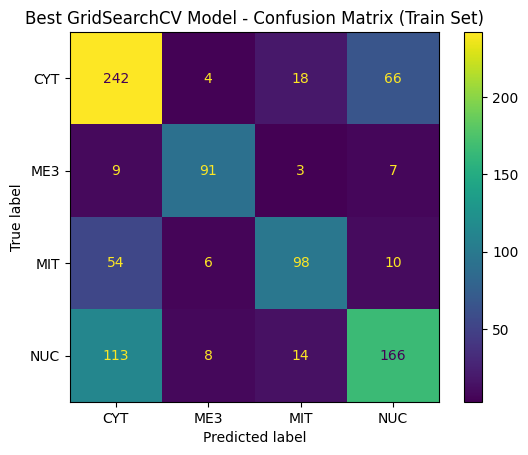


Best GridSearchCV Model Accuracy on Validation Set: 64.62%


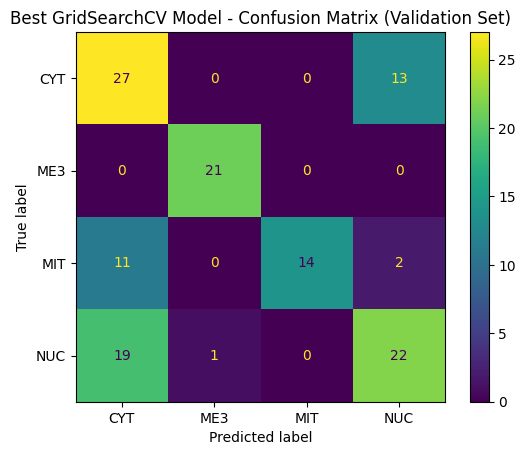

Classification Report (Best GridSearchCV Model - Validation Set):
              precision    recall  f1-score   support

         CYT       0.47      0.68      0.56        40
         ME3       0.95      1.00      0.98        21
         MIT       1.00      0.52      0.68        27
         NUC       0.59      0.52      0.56        42

    accuracy                           0.65       130
   macro avg       0.76      0.68      0.69       130
weighted avg       0.70      0.65      0.65       130



In [19]:
# Train the model using the best parameters from GridSearchCV
svm_best_grid = SVC(**best_params_grid, decision_function_shape='ovo', random_state=42)
svm_best_grid.fit(X_train, y_train)


# TRAINING ACCURACY for the BEST MODEL.
# Predict on validation set
y_train_pred_best_grid = svm_best_grid.predict(X_train) 

training_accuracy_best_grid = accuracy_score(y_train, y_train_pred_best_grid)
print(f"\nBest GridSearchCV Model Accuracy on Training Set: {training_accuracy_best_grid * 100:.2f}%")

# Generate and plot confusion matrix for test set
cm_best_grid = confusion_matrix(y_train, y_train_pred_best_grid, labels=svm_best_grid.classes_)
cm_disp_best_grid = ConfusionMatrixDisplay(confusion_matrix=cm_best_grid, display_labels=variety)
cm_disp_best_grid.plot()
plt.title("Best GridSearchCV Model - Confusion Matrix (Train Set)")
plt.show()

# VALIDATION ACCURACY for the BEST MODEL.
# Predict on validation set
y_val_pred_best_grid = svm_best_grid.predict(X_validate)
validation_accuracy_best_grid = accuracy_score(y_validate, y_val_pred_best_grid)
print(f"\nBest GridSearchCV Model Accuracy on Validation Set: {validation_accuracy_best_grid * 100:.2f}%")

# Generate and plot confusion matrix for test set
cm_best_grid = confusion_matrix(y_validate, y_val_pred_best_grid, labels=svm_best_grid.classes_)
cm_disp_best_grid = ConfusionMatrixDisplay(confusion_matrix=cm_best_grid, display_labels=variety)
cm_disp_best_grid.plot()
plt.title("Best GridSearchCV Model - Confusion Matrix (Validation Set)")
plt.show()

# Display classification reports
print("Classification Report (Best GridSearchCV Model - Validation Set):")
print(classification_report(y_validate, y_val_pred_best_grid, target_names=variety)) 

Hyperparameter Tuning with RandomSearch 

In [21]:
param_distributions_list = [
    {
        'C': uniform(0.1, 1),  # C between 0.1 and 1.1
        'gamma': uniform(0.01, 0.09),  # gamma between 0.01 and 0.10
        'kernel': ['poly'],  # Unsuitable
        'degree': randint(2,4)      
    },
    {
        'C': uniform(0.01, 0.09),  # Lower C decreases accuracy
        'gamma': uniform(0.01, 0.09),
        'kernel': ['poly'],
        'degree': randint(2,4)    
    },
    {
        'C': uniform(0.1, 0.9),      
        'gamma': uniform(0.01, 0.09),
        'kernel': ['rbf','poly', 'sigmoid'],   
        'degree': randint(2,4)     
    },
    {
        'C': uniform(1, 9),  # C between 1 and 10
        'gamma': uniform(0.1,0.9), 
        'kernel': ['rbf', 'poly', 'sigmoid'],   
        'degree': randint(3,6),
    },
    {
        'C': uniform(1, 9), 
        'gamma': uniform(0.1,0.9), 
        'kernel': ['rbf', 'poly', 'sigmoid'],   
        'degree': randint(3,6),
        'coef0': uniform(0.0, 1.0),  # Optimize for 'poly' and 'sigmoid'
    },
    {
        'C': uniform(0.1, 9.9), 
        'gamma': uniform(0.1,0.9), 
        'kernel': ['rbf', 'poly', 'sigmoid'],   
        'degree': randint(3,6), 
        'coef0': uniform(0.0, 1.0),  
    },
    {
        'C': uniform(5, 5),  
        'gamma': uniform(0.1,0.9), 
        'kernel': ['rbf', 'poly', 'sigmoid'],   
        'degree': randint(3,6),
        'coef0': uniform(0.0, 1.0),
    },
]

print("\n" + "=" * 50)
print("Starting RandomizedSearchCV...")
print("=" * 50)

# Initialize variables to track best RandomizedSearchCV results

best_random_accuracy = 0
best_random_params = None
best_random_search = None

# Define a threshold for overfitting (difference between training and validation accuracy)
overfit_threshold = 0.05  # 5%


# Perform RandomizedSearchCV for each parameter distribution
for i, param_distributions in enumerate(param_distributions_list):
    print(f"\nStarting RandomizedSearchCV with Parameter Distribution {i+1}")
    print("-" * 50)
    
    random_search = RandomizedSearchCV(  
        estimator=SVC(),
        param_distributions=param_distributions,
        n_iter=30,  # Number of parameter settings sampled
        scoring='accuracy',
        refit=True,
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        verbose=1,
        random_state=42,
        n_jobs=-1
    )
    
    # Fit RandomizedSearchCV
    start_time = time.time()
    random_search.fit(X_train, y_train)
    end_time = time.time()
    
    # Calculate training accuracy
    train_pred_random = random_search.best_estimator_.predict(X_train)
    training_accuracy_random = accuracy_score(y_train, train_pred_random)
    print(f"Training Accuracy with Parameter Distribution {i+1}: {training_accuracy_random * 100:.2f}%")
    
    # Calculate validation accuracy
    y_validate_pred_random = random_search.best_estimator_.predict(X_validate)
    validation_accuracy_random = accuracy_score(y_validate, y_validate_pred_random)
    print(f"\nValidation Accuracy with Parameter Distribution {i+1}: {validation_accuracy_random * 100:.2f}%")
    print(f"\nBest Parameters within Parameter Distribution {i + 1}:", random_search.best_params_)
    print(f"Completed in {end_time - start_time:.2f} seconds")
    print("-" * 50)
    
    # Calculate the difference between training and validation accuracy
    accuracy_difference = training_accuracy_random - validation_accuracy_random
    
    # Condition to select the best model:
    # 1. Higher validation accuracy
    # 2. Low accuracy difference (below threshold to avoid overfitting)
    if (validation_accuracy_random > best_random_accuracy) and (accuracy_difference <= overfit_threshold):
        best_random_accuracy = validation_accuracy_random
        best_random_params = random_search.best_params_
        best_random_search = random_search

if best_random_accuracy > validation_accuracy_baseline:
    print()
    print("=" * 50)
    print(f"Best RandomizedSearch Tuned Model Validation Accuracy: {best_random_accuracy * 100:.2f}%")
    print("This tuned model performs better than the baseline model!")
    print("\nThis is the combination of hyperparameters in best model optimized by RandomizedSearchCV (i.e. best combination of hyperparameters across all Parameter Distributions):\n",  best_random_params)
else:
    print()
    print("=" * 50)
    print("The RandomizedSearch tuned model did not outperform the baseline model.")
    print(f"Baseline Validation Accuracy: {validation_accuracy_baseline * 100:.2f}%")
    print(f"Best Tuned Model Accuracy: {best_random_accuracy * 100:.2f}%")



Starting RandomizedSearchCV...

Starting RandomizedSearchCV with Parameter Distribution 1
--------------------------------------------------
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Training Accuracy with Parameter Distribution 1: 48.95%

Validation Accuracy with Parameter Distribution 1: 45.38%

Best Parameters within Parameter Distribution 1: {'C': 1.021874235023117, 'degree': 3, 'gamma': 0.061339957696485946, 'kernel': 'poly'}
Completed in 0.47 seconds
--------------------------------------------------

Starting RandomizedSearchCV with Parameter Distribution 2
--------------------------------------------------
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Training Accuracy with Parameter Distribution 2: 37.95%

Validation Accuracy with Parameter Distribution 2: 33.08%

Best Parameters within Parameter Distribution 2: {'C': 0.09296868115208051, 'degree': 3, 'gamma': 0.061339957696485946, 'kernel': 'poly'}
Completed in 0.47 seconds
---------------


Best RandomizedSearchCV Model Accuracy on Training Set: 67.33%


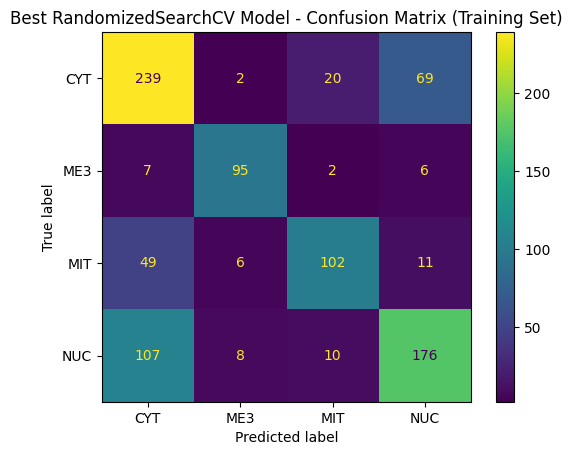


Best RandomizedSearchCV Model Accuracy on Validation Set: 68.46%


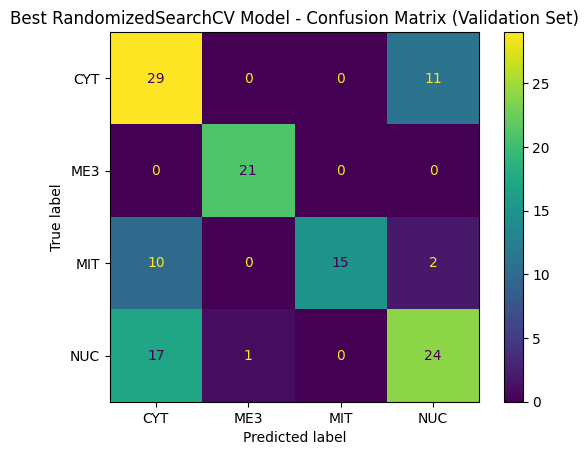

Classification Report (Best RandomizedSearchCV Model - Validation Set):
              precision    recall  f1-score   support

         CYT       0.52      0.72      0.60        40
         ME3       0.95      1.00      0.98        21
         MIT       1.00      0.56      0.71        27
         NUC       0.65      0.57      0.61        42

    accuracy                           0.68       130
   macro avg       0.78      0.71      0.73       130
weighted avg       0.73      0.68      0.69       130



In [22]:
# Train the best RandomizedSearchCV model
svm_best_random = SVC(**best_random_params, decision_function_shape='ovo', random_state=42)
svm_best_random.fit(X_train, y_train) 

# Predict on training set
y_train_pred_best_random = svm_best_random.predict(X_train)
training_accuracy_best_random = accuracy_score(y_train, y_train_pred_best_random)
print(f"\nBest RandomizedSearchCV Model Accuracy on Training Set: {training_accuracy_best_random * 100:.2f}%")

# Generate and plot confusion matrix for test set
cm_best_random = confusion_matrix(y_train, y_train_pred_best_random, labels=svm_best_random.classes_)
cm_disp_best_random = ConfusionMatrixDisplay(confusion_matrix=cm_best_random, display_labels=variety)
cm_disp_best_random.plot()
plt.title("Best RandomizedSearchCV Model - Confusion Matrix (Training Set)")
plt.show()

# Predict on validation set
y_validate_pred_best_random = svm_best_random.predict(X_validate)
validation_accuracy_best_random = accuracy_score(y_validate, y_validate_pred_best_random)
print(f"\nBest RandomizedSearchCV Model Accuracy on Validation Set: {validation_accuracy_best_random * 100:.2f}%")


# Generate and plot confusion matrix for test set
cm_best_random = confusion_matrix(y_validate, y_validate_pred_best_random, labels=svm_best_random.classes_)
cm_disp_best_random = ConfusionMatrixDisplay(confusion_matrix=cm_best_random, display_labels=variety)
cm_disp_best_random.plot()
plt.title("Best RandomizedSearchCV Model - Confusion Matrix (Validation Set)")
plt.show()

# Display classification reports
print("Classification Report (Best RandomizedSearchCV Model - Validation Set):")
print(classification_report(y_validate, y_validate_pred_best_random, target_names=variety))


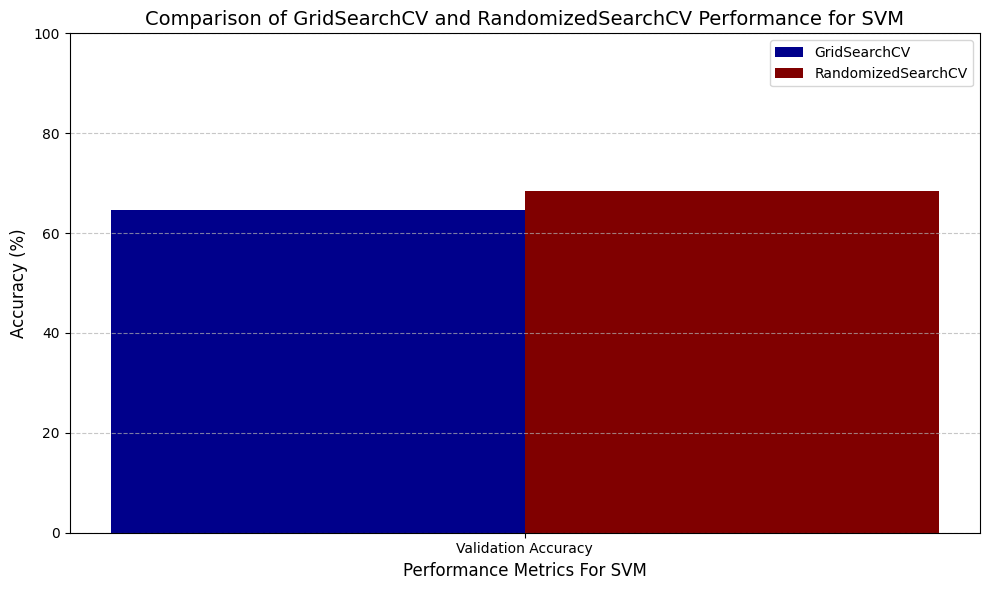

In [23]:
def barChartComparison(grid_accuracy_val, random_accuracy_val):
    """
    Plots a bar chart comparing the validation and test accuracies of GridSearchCV and RandomizedSearchCV.
    """
    # Prepare Data for Bar Chart
    metrics = ["Validation Accuracy"]
    grid_accuracies = [grid_accuracy_val * 100]
    random_accuracies = [random_accuracy_val * 100]

    # Plotting the bar chart
    x = np.arange(len(metrics))
    width = 0.35  # Width of the bars

    plt.figure(figsize=(10, 6))
    plt.bar(x, grid_accuracies, width=width, label="GridSearchCV", color="darkblue")
    plt.bar(x + width, random_accuracies, width=width, label="RandomizedSearchCV", color="maroon")

    # Labels and legend for the bar chart
    plt.title("Comparison of GridSearchCV and RandomizedSearchCV Performance for SVM", fontsize=14)
    plt.xlabel("Performance Metrics For SVM", fontsize=12)
    plt.ylabel("Accuracy (%)", fontsize=12)
    plt.xticks(x + width / 2, metrics)  # Center the ticks
    plt.legend()
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.ylim(0, 100)
    plt.tight_layout()

    # Show Plot
    plt.show()

    # Print Results
  #  print("\n=== Validation and Test Performance ===")
  #  print(f"GridSearchCV Validation Accuracy: {grid_accuracy_val * 100:.2f}%")
  #  print(f"RandomizedSearchCV Validation Accuracy: {random_accuracy_val * 100:.2f}%")

# Calling the function to compare performances
barChartComparison(
    grid_accuracy_val=validation_accuracy_best_grid,
    random_accuracy_val=validation_accuracy_best_random,
)


Accuracy of classification of TESTING DATA by BEST MODEL SVM (that optimized with RandomizedSearchCV): 66.54

Confusion Matrix for the SVM BEST MODEL's performance on the TESTING DATASET (that optimized with RandomizedSearchCV) (values within the array):
 [[66  2  2 23]
 [ 1 30  0  1]
 [16  2 27  4]
 [27  5  4 50]]


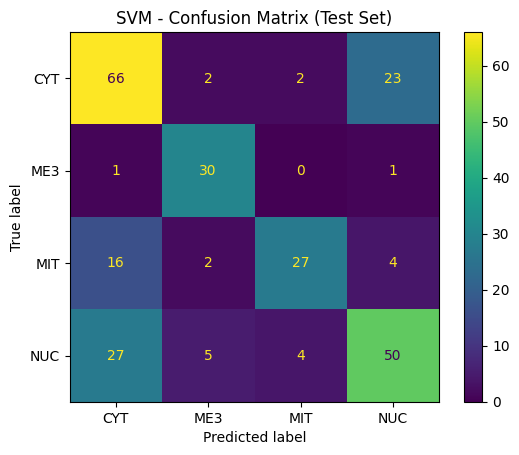

Classification Report of SVM Best Model (that optimized by RandomizedSearchCV) - Testing Set:
              precision    recall  f1-score   support

         CYT       0.60      0.71      0.65        93
         ME3       0.77      0.94      0.85        32
         MIT       0.82      0.55      0.66        49
         NUC       0.64      0.58      0.61        86

    accuracy                           0.67       260
   macro avg       0.71      0.69      0.69       260
weighted avg       0.68      0.67      0.66       260



In [24]:
# TESTING ACCURACY for the BEST MODEL SVM –– that optimized with RandomizedSearchCV.
#Predict labels for the testing data 
test_pred_best_model = svm_best_random.predict(X_test)

#Calculate accuracy of classification of testing data (Is the model overfitting? Compare to accuracy of classification of training data)
best_model_testing_accuracy_svm = accuracy_score(y_test, test_pred_best_model)
print("\nAccuracy of classification of TESTING DATA by BEST MODEL SVM (that optimized with RandomizedSearchCV): %.2f" % (best_model_testing_accuracy_svm*100)) 

#Generate Confusion Matrix (2D array to evaluate accuracy of classification of testing data by BEST MODEL)
cm_best_model_testing = confusion_matrix(y_test, test_pred_best_model)
print("\nConfusion Matrix for the SVM BEST MODEL's performance on the TESTING DATASET (that optimized with RandomizedSearchCV) (values within the array):\n", cm_best_model_testing)

# Create ConfusionMatrixDisplay object. First argument: Confusion Matrix, Second argument: Names of target classes
cm_best_model_testing_disp = ConfusionMatrixDisplay(confusion_matrix=cm_best_model_testing, display_labels=variety)
# Plot values of Confusion Matrix against corresponding target classes.
cm_best_model_testing_disp.plot()
plt.title("SVM - Confusion Matrix (Test Set)")
#Display all open figures
plt.show()

# Display classification reports for BEST MODEL optimized by RandomizedSearchCV TEST SET (i.e. best model overall)
print("Classification Report of SVM Best Model (that optimized by RandomizedSearchCV) - Testing Set:")
print(classification_report(y_test, test_pred_best_model, target_names=variety)) 


# SVM Decision Boundary Visualization with 'mcg' and 'gvh'


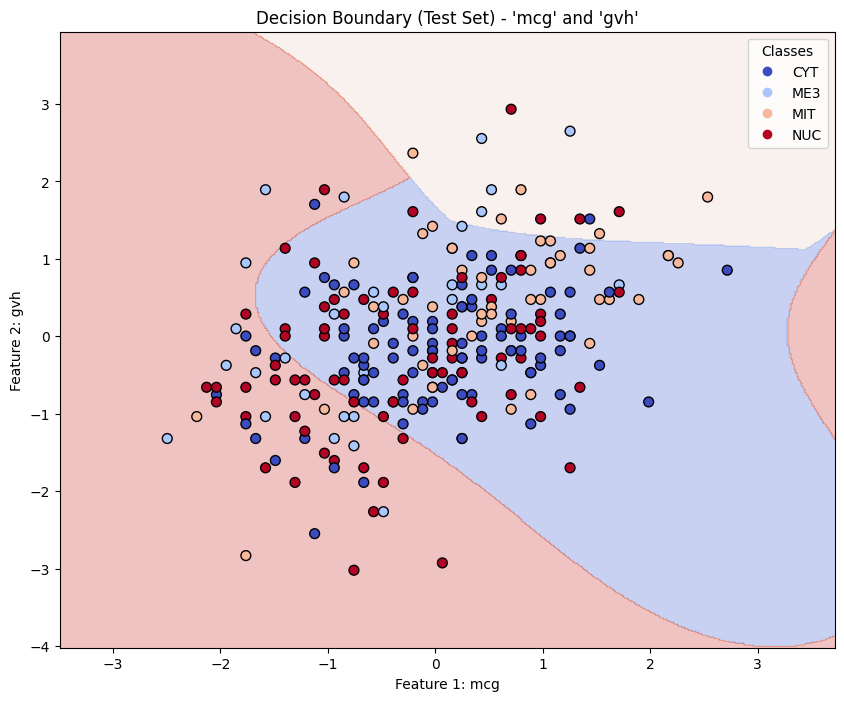

In [26]:
# =======================
# SVM Decision Boundary Visualization with 'mcg' and 'gvh'
# =======================

# Select 'mcg' and 'gvh' features only
# Ensure the label encoder is fitted before transforming
label_encoder = LabelEncoder()  # Initialize a new LabelEncoder
label_encoder.fit(yeast_data['Localization_Site'].values)  # Fit the encoder with unique labels

X_selected = yeast_data[['mcg', 'gvh']].values
y = label_encoder.transform(yeast_data['Localization_Site'].values)  # Transform labels to integers
variety = label_encoder.classes_  # Retrieve the class names for later use

# Standardize the selected features
scaler = StandardScaler()
X_selected_scaled = scaler.fit_transform(X_selected)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_selected_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Train the SVM model with the selected features
svm_model_2d = svm_best_random
svm_model_2d.fit(X_train, y_train)

def plot_decision_boundary(model, X, y, title, variety):
    # Define the range of the plot
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Create a meshgrid
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))

    # Predict over the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plotting
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k', cmap=plt.cm.coolwarm)

    # Generate the legend properly
    handles, _ = scatter.legend_elements()  # Automatically get unique handles
    plt.legend(handles, variety, title="Classes", loc="upper right")

    plt.title(title)
    plt.xlabel('Feature 1: mcg')
    plt.ylabel('Feature 2: gvh')
    plt.show()

# Use the plot_decision_boundary function to visualize
# Plot for test data
plot_decision_boundary(
    model=svm_model_2d,
    X=X_test,
    y=y_test,
    title="Decision Boundary (Test Set) - 'mcg' and 'gvh'",
    variety=variety
)



# Decision Tree Model


Accuracy of classification of TRAINING DATA by BASELINE MODEL: 100.00

Confusion Matrix for the BASELINE MODEL's performance on the TRAINING DATASET (values within the array):
 [[320   0   0   0]
 [  0 124   0   0]
 [  0   0 163   0]
 [  0   0   0 302]]


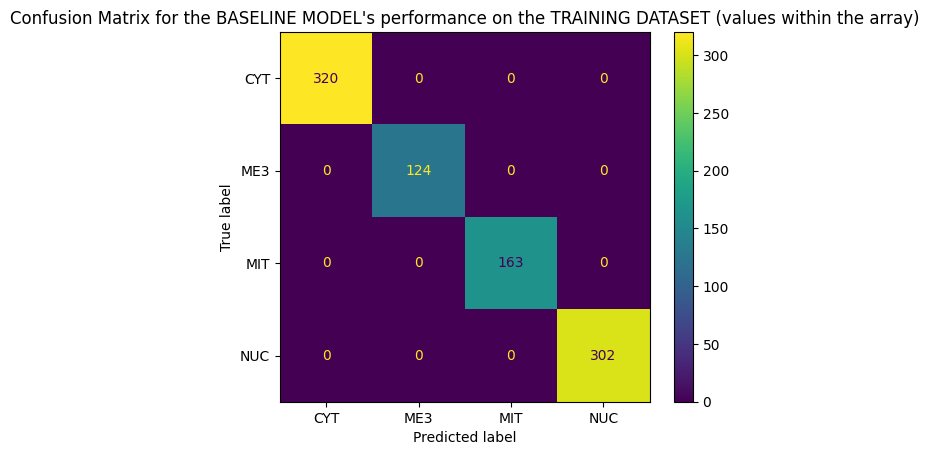


Accuracy of classification of VALIDATION DATA by BASELINE MODEL: 53.08

Confusion Matrix for the BASELINE MODEL's performance on the VALIDATION DATASET (values within the array):
 [[24  1  5 20]
 [ 1  8  3  0]
 [ 9  2 15  5]
 [11  1  3 22]]


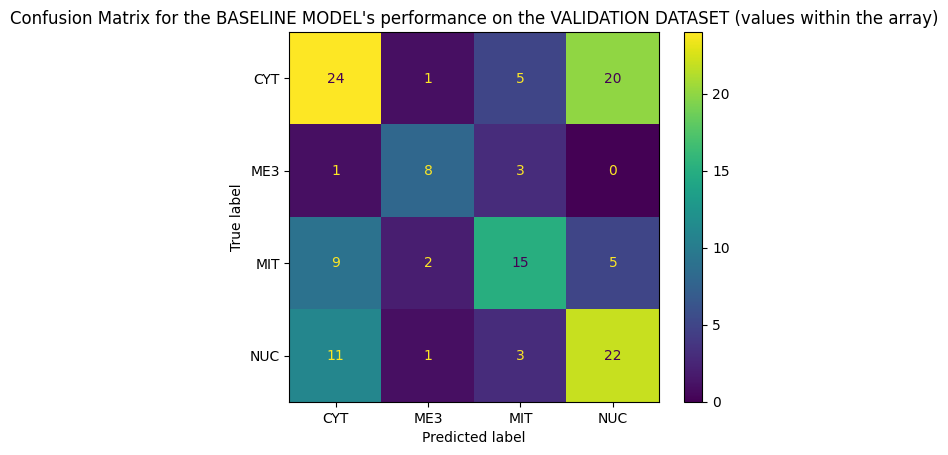

In [28]:
from sklearn.tree import DecisionTreeClassifier

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=51)

# Split training set into validation and reduced training set
X_validation, X_train = X_train_full[:130], X_train_full[130:]
y_validation, y_train = y_train_full[:130], y_train_full[130:]

# BASELINE MODEL (trained on TRAINING DATASET with NO hyperparameter tuning, and tested on TRAINING DATASET and VALIDATION DATASET to get its TRAINING ACCURACY and VALIDATION ACCURACY: Is the model learning? Is the model overfitting? Are baseline results "too good"/is the problem too easy?  
#Create the baseline decision tree (with default hyperparameters, such as 'entropy')
baseline_decision_tree = DecisionTreeClassifier(criterion = 'entropy')

#Fitting the baseline model / train the Decision Tree on the training data 
baseline_decision_tree.fit(X_train,y_train)

#Have the baseline model predict labels for the training data
train_pred_baseline = baseline_decision_tree.predict(X_train) #formely, X_test

#Have the baseline model predict labels for the validation data
val_pred_baseline = baseline_decision_tree.predict(X_validation) #formely, X_test

#Calculate BASELINE TRAINING ACCURACY (accuracy of classification of training data by BASELINE MODEL) –– Is the model learning? 
baseline_accuracy = accuracy_score(y_train, train_pred_baseline)
print("\nAccuracy of classification of TRAINING DATA by BASELINE MODEL: %.2f" % (baseline_accuracy*100))

#Generate Confusion Matrix (2D array to evaluate accuracy of classification of training data by BASELINE MODEL)
cm_baseline = confusion_matrix(y_train, train_pred_baseline)
print("\nConfusion Matrix for the BASELINE MODEL's performance on the TRAINING DATASET (values within the array):\n", cm_baseline)

# Create ConfusionMatrixDisplay object. First argument: Confusion Matrix, Second argument: Names of target classes
cm_baseline_disp = ConfusionMatrixDisplay(confusion_matrix=cm_baseline, display_labels=variety)
# Plot values of Confusion Matrix against corresponding target classes.
cm_baseline_disp.plot()
plt.title("Confusion Matrix for the BASELINE MODEL's performance on the TRAINING DATASET (values within the array)")
#Display all open figures –– in our case, display the plot generated by cm_baseline_disp.plot()
plt.show() 

#Calculate BASELINE VALIDATION ACCURACY (accuracy of classification of validation data by BASELINE MODEL) –– Is the model overfitting? 
#Compare BASELINE VALIDATION ACCURACY to TUNED/OPTIMIZED MODEL'S VALIDATION ACCURACY (i.e. accuracy of classification of other models where hyperparameters were defined) to determine if 
#the model supposed an improvement in comparison to the baseline (as well as previous improvements). If it does not, the model's generalization capabilities have 
#NOT improved with the last hyperparameter tuning. One of the reasons for this may be that the last set of hyperparameter tuning is causing the model to overfit.) 
baseline_accuracy = accuracy_score(y_validation, val_pred_baseline)
print("\nAccuracy of classification of VALIDATION DATA by BASELINE MODEL: %.2f" % (baseline_accuracy*100))

#Generate Confusion Matrix (2D array to evaluate accuracy of classification of validation data by BASELINE MODEL)
cm_baseline = confusion_matrix(y_validation, val_pred_baseline)
print("\nConfusion Matrix for the BASELINE MODEL's performance on the VALIDATION DATASET (values within the array):\n", cm_baseline)

# Create ConfusionMatrixDisplay object. First argument: Confusion Matrix, Second argument: Names of target classes
cm_baseline_disp = ConfusionMatrixDisplay(confusion_matrix=cm_baseline, display_labels=variety)
# Plot values of Confusion Matrix against corresponding target classes.
cm_baseline_disp.plot()
plt.title("Confusion Matrix for the BASELINE MODEL's performance on the VALIDATION DATASET (values within the array)")
#Display all open figures –– in our case, display the plot generated by cm_baseline_disp.plot()
plt.show()

# Hyperparameter tuning (Decision Tree)

Hyperparameter tuning with GridSearch

In [31]:
# Hyperparameter tuning starting from BASELINE MODEL with GridSearchCV –– 1st tuned model

# Retireve default parameters used on baseline model to decide on an appropriate range for the possible hyperparameter value combinations
default_params = baseline_decision_tree.get_params()
print("\n", "These are the default hyperparameters used in the baseline model (the standard for DecisionTrees):\n", default_params.items())

# Manually define the parameter grid for tuning based on the default hyperparameters used in the baseline model. 

param_grid = {
    'ccp_alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
   # 'class_weight': [None], # Dataset is already balanced, as classes associated with a low number of cases were removed via data wrangling (implemented in class data_normalization.py)
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 10, 20, 30],
    'max_features': [None, 'log2'], # Additional parameter values if model overfits 0.5, 0.75, 0.1, 0.2] # if model underfits, use LARGER numbers –– smaller values may lead to the model UNDERFITTING. Must find appropriate range.
    'max_leaf_nodes': [None, 5, 10, 20, 50, 100, 200], # if model overfits, use smaller numbers –– larger numbers may lead to the model overfitting. Must find appropriate range. 
    'min_impurity_decrease': [0.0001, 0.001, 0.01, 0.1], # if model overfits, use smaller numbers –– larger numbers may lead to the model overfitting. Must find appropriate range. 
    'min_samples_leaf': [2, 5, 10], # Additional parameter values if model overfits , 20, 50], # if model overfits, use larger numbers, as large values are less likely to overfit/could prevent overfitting. However, values that are too large could have the opoosite effect and may lead to the model underfitting. Must find appropriate range. 
    'min_samples_split': [2, 5, 10, 20], # Additional parameter values if model overfits , 50], # if model overfits, use larger numbers –– smaller values may lead to the model overfitting. However, values that are too large could lead to the model underfitting. Must find appropriate range.
    'min_weight_fraction_leaf': [0.001, 0.01, 0.05, 0.1], # Additional parameter values if model overfits , 0.2] 
   # 'monotonic_cst': [None, "increasing", "decreasing"],
     'random_state':[42]
}
param_grid_2 = {
    'ccp_alpha': [0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001],
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, 20, 30],
    'max_features': [None, 'log2'], 
    'max_leaf_nodes': [19, 20, 21],
    'min_impurity_decrease': [0.00004, 0.000008, 0.0000016, 0.00000032, 0.000000064],
    'min_samples_leaf': [10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_weight_fraction_leaf': [0.00008, 0.000016, 0.0000032, 0.00000064, 0.000000128],
    'random_state':[42]
}

param_grid_4 = {
    'ccp_alpha': [0.00000625, 0.0000125, 0.000025, 0.00005, 0.0001],
    'criterion': ['gini', 'entropy'],
    'max_depth': [6, 8, 10],
    'max_features': [None, 'log2'],
    'max_leaf_nodes': [20, 21, 22],
    'min_impurity_decrease': [0.001, 0.005, 0.025, 0.125, 0.625],
    'min_samples_leaf': [11, 13, 15],
    'min_samples_split': [2, 5, 10],
    'min_weight_fraction_leaf': [0.002, 0.01, 0.05, 0.25],
    'random_state':[42]
}

param_grid_5 = {
    'ccp_alpha': [0.0000015625, 0.000003125, 0.00000625, 0.0000125, 0.000025],
    'criterion': ['gini', 'entropy'],
    'max_depth': [7, 8, 9],
    'max_features': [None, 'log2'], 
    'max_leaf_nodes': [21, 22, 23],
    'min_impurity_decrease': [0.00025, 0.0005, 0.001, 0.002, 0.004],
    'min_samples_leaf': [12, 13, 14],
    'min_samples_split': [2, 3, 5],
    'min_weight_fraction_leaf': [0.0005, 0.002, 0.001, 0.002, 0.004],
    'random_state':[42]
}
                     
param_grid_6 = {
    'ccp_alpha': [0.00000625, 0.0000125, 0.000025, 0.00005, 0.0001],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None],
    'max_features': [None, 'log2'],
    'max_leaf_nodes': [20, 21, 22],
    'min_impurity_decrease': [0.001, 0.005, 0.025, 0.125, 0.625],
    'min_samples_leaf': [11, 13, 15],
    'min_samples_split': [2, 5, 10],
    'min_weight_fraction_leaf': [0.002, 0.01, 0.05, 0.25],
    'random_state':[42]
}

all_param_grids = [param_grid, param_grid_2, param_grid_4, param_grid_5, param_grid_6]
grid_names = ["param_grid", "param_grid_2", "param_grid_4", "param_grid_5", "param_grid_6"]
# Initialize StratifiedKFold for cross-validation
stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

overfit_threshold = 10.00  # Example: 5%

best_accuracy = 0
best_params_grid = None
best_grid = None

print("\n" + "=" * 50)
print("Starting GridSearchCV...")
print("=" * 50)


for i, param in enumerate(all_param_grids):
    print(f"\nStarting GridSearchCV for {grid_names[i]}")
    print("-" * 50)

    grid = GridSearchCV(DecisionTreeClassifier(), param, refit=True, cv=stratified_kfold, verbose=1, n_jobs=-1)
    
    grid.fit(X_train, y_train)  # Replace X_train, y_train with your training data

    # Get the best model and its performance
    best_model_grid = grid.best_estimator_
    y_validate_pred = best_model_grid.predict(X_validation)  # Replace X_validation with your validation data
    validation_accuracy = accuracy_score(y_validation, y_validate_pred)

    # Evaluate training accuracy
    y_train_pred = best_model_grid.predict(X_train)
    training_accuracy = accuracy_score(y_train, y_train_pred)

    # Calculate accuracy difference
    accuracy_diff = training_accuracy - validation_accuracy

    # Print metrics
    print(f"Validation Accuracy: {validation_accuracy * 100:.2f}%\n")
    print(f"Training Accuracy: {training_accuracy * 100:.2f}%\n")
    print(f"Accuracy Difference: {accuracy_diff * 100:.2f}%\n")
    print(f"\nThis is the best combination of hyperparameters within Parameterof {grid_names[i]}:", grid.best_params_)
    print("-" * 50)

    # Update the best model based on criteria
    if validation_accuracy > best_accuracy and accuracy_diff <= overfit_threshold:
        best_accuracy = validation_accuracy
        best_model = best_model_grid
        best_params = grid.best_params_


if best_accuracy > baseline_accuracy:
    print()
    print("=" * 50)
    print(f"Best GridSearchCV Tuned Model Validation Accuracy: {best_accuracy * 100:.2f}%\n")
    print("This tuned model performs better than the baseline model!\n")

else:
    print()
    print("=" * 50)
    print("The GridSearchCV tuned model did not outperform the baseline model.\n")
    print(f"Baseline Validation Accuracy: {baseline_accuracy * 100:.2f}%\n")
    print(f"Best GridSearchCV Tuned Model Accuracy: {best_accuracy * 100:.2f}%\n") 

# Initialize GridSearchCV. Generates the different combinations of hyperparameters from param_grid. It also refits the model (refit=True) with the best combination of hyperparameters using the entire training dataset after training and testing of all possible combinations of hyperparameters is completed and the best combination has been identified. 
grid = GridSearchCV(DecisionTreeClassifier(), param_grid_4, refit=True, cv=stratified_kfold, verbose=1, n_jobs=-1) 

# Trains the model using the different combinations of hyperparameters, training the model once per combination. It also tests the different combinations of hyperparameters/different models trained with different hyperparameters for the best using cross-validation –– it evaluates the performance of models trained with different hyperparameters combinations to find the best one by using the n-1 fold that was not used in training as a validation dataset for evaluating performance.  
grid.fit(X_train, y_train)

# The combination of parameters that resulted in the model with highest performance.
best_hyperparameters = grid.best_params_ 
print("\nThis is the combination of hyperparameters in best model optimized by GridSearchCV (i.e. best combination of hyperparameters across all Parameter Grids):\n", best_hyperparameters) 

# This is the best model, automatically retrained with the combination of hyperparameters from param_grid that gives the best results after this are evaluated and identified
best_model = grid.best_estimator_
print("\nThis is the best model optimized by GridSearchCV :\n", best_model) 

# Average of the accuracy of classification of the n-1 fold not used in training by the best model across all folds.
best_model_accuracy_validation_fold = grid.best_score_
print("\nThis is the average accuracy of classification of the n-1 fold across folds (GridSearchCV) : %.2f" % (best_model_accuracy_validation_fold*100)) 




 These are the default hyperparameters used in the baseline model (the standard for DecisionTrees):
 dict_items([('ccp_alpha', 0.0), ('class_weight', None), ('criterion', 'entropy'), ('max_depth', None), ('max_features', None), ('max_leaf_nodes', None), ('min_impurity_decrease', 0.0), ('min_samples_leaf', 1), ('min_samples_split', 2), ('min_weight_fraction_leaf', 0.0), ('monotonic_cst', None), ('random_state', None), ('splitter', 'best')])

Starting GridSearchCV...

Starting GridSearchCV for param_grid
--------------------------------------------------
Fitting 3 folds for each of 225792 candidates, totalling 677376 fits
Validation Accuracy: 57.69%

Training Accuracy: 70.19%

Accuracy Difference: 12.49%


This is the best combination of hyperparameters within Parameterof param_grid: {'ccp_alpha': 0.001, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': 20, 'min_impurity_decrease': 0.0001, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_


Accuracy of classification of TRAINING DATA by BEST MODEL optimized by GridSearchCV: 68.65

Confusion Matrix for the performance of the BEST MODEL optimized by GridSearchCV on the TRAINING DATASET (values within the array):
 [[214   6  15  85]
 [  3 113   4   4]
 [ 44   7 100  12]
 [ 74  15  16 197]]


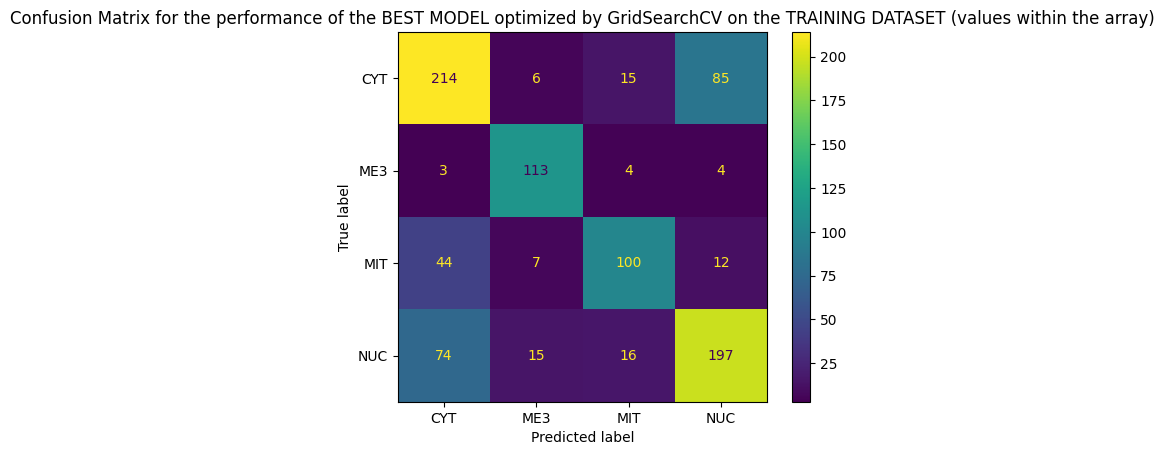


Accuracy of classification of VALIDATION DATA by BEST MODEL optimized by GridSearchCV: 60.77

Confusion Matrix for the performance of the BEST MODEL optimized by GridSearchCV on the VALIDATION DATASET (values within the array):
 [[26  0  2 22]
 [ 1 10  0  1]
 [ 8  4 15  4]
 [ 8  0  1 28]]


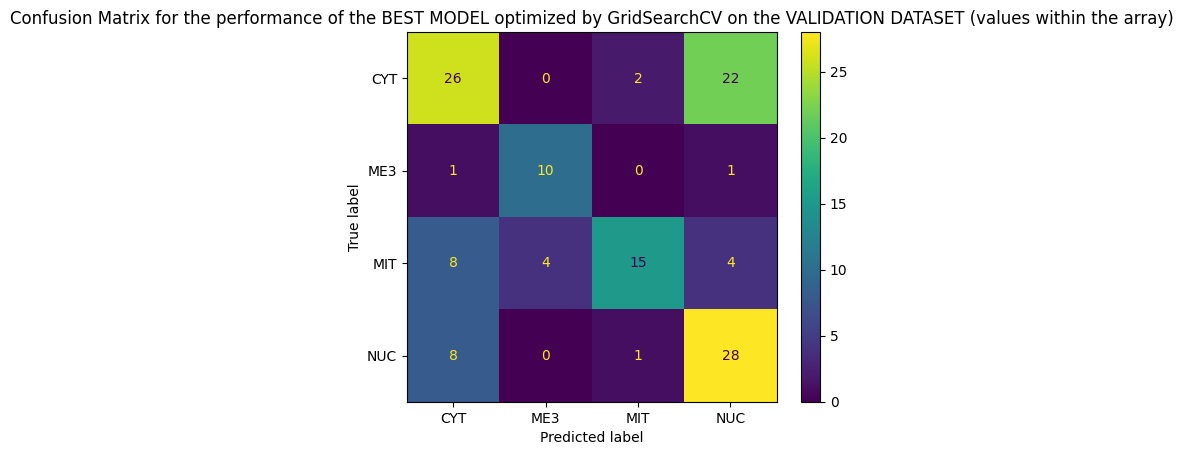

In [32]:
# TRAINING ACCURACY for the BEST MODEL GridSearchCV.
#Predict labels for the training data
train_pred_best_model = best_model.predict(X_train)

#Calculate accuracy of classification of training data (Is the model overfitting? Compare to accuracy of classification of validation data)
best_model_training_accuracy = accuracy_score(y_train, train_pred_best_model)
print("\nAccuracy of classification of TRAINING DATA by BEST MODEL optimized by GridSearchCV: %.2f" % (best_model_training_accuracy*100))

#Generate Confusion Matrix (2D array to evaluate accuracy of classification of training data by BEST MODEL)
cm_best_model_training = confusion_matrix(y_train, train_pred_best_model)
print("\nConfusion Matrix for the performance of the BEST MODEL optimized by GridSearchCV on the TRAINING DATASET (values within the array):\n", cm_best_model_training)

# Create ConfusionMatrixDisplay object. First argument: Confusion Matrix, Second argument: Names of target classes 
cm_best_model_training_disp = ConfusionMatrixDisplay(confusion_matrix=cm_best_model_training, display_labels=variety)
# Plot values of Confusion Matrix against corresponding target classes.
cm_best_model_training_disp.plot()
#Display all open figures
plt.title("Confusion Matrix for the performance of the BEST MODEL optimized by GridSearchCV on the TRAINING DATASET (values within the array)")
plt.show()

# VALIDATION ACCURACY for the BEST MODEL GridSearchCV.
#Have the BEST MODEL predict labels for the validation data
val_pred_best_model = best_model.predict(X_validation)

# Calculate BEST MODEL VALIDATION ACCURACY (accuracy of classification of validation data by BEST MODEL) 
best_model_accuracy = accuracy_score(y_validation, val_pred_best_model)
print("\nAccuracy of classification of VALIDATION DATA by BEST MODEL optimized by GridSearchCV: %.2f" % (best_model_accuracy*100))

#Generate Confusion Matrix (2D array to evaluate accuracy of classification of validation data by BEST MODEL)
cm_best_model = confusion_matrix(y_validation, val_pred_best_model)
print("\nConfusion Matrix for the performance of the BEST MODEL optimized by GridSearchCV on the VALIDATION DATASET (values within the array):\n", cm_best_model)

# Create ConfusionMatrixDisplay object. First argument: Confusion Matrix, Second argument: Names of target classes
cm_best_model_disp = ConfusionMatrixDisplay(confusion_matrix=cm_best_model, display_labels=variety)
# Plot values of Confusion Matrix against corresponding target classes.
cm_best_model_disp.plot()
#Display all open figures
plt.title("Confusion Matrix for the performance of the BEST MODEL optimized by GridSearchCV on the VALIDATION DATASET (values within the array)")
plt.show() 



Accuracy of classification of X_train_rfe (transformed training data) by BEST MODEL optimized by GridSearchCV after RFE: 68.65

Confusion Matrix for accuracy of classification of X_train_rfe (transformed training data) by BEST MODEL optimized by GridSearchCV after RFE:
 [[214   6  15  85]
 [  3 113   4   4]
 [ 44   7 100  12]
 [ 74  15  16 197]]


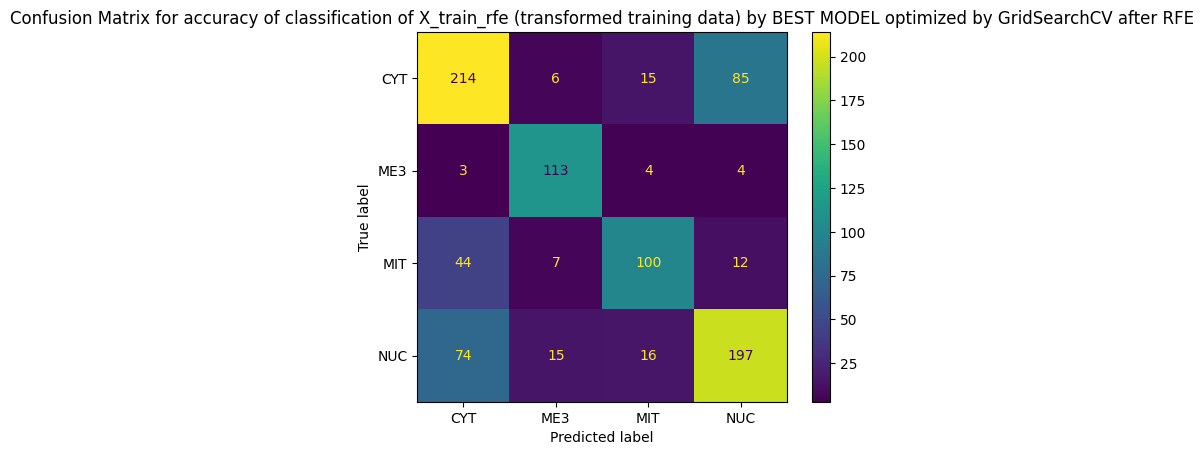


Accuracy of classification of X_validation_rfe (transformed validation data) by BEST MODEL optimized by GridSearchCV after RFE: 60.77

Confusion Matrix for accuracy of classification of X_validation_rfe (transformed validation data) by BEST MODEL optimized by GridSearchCV after RFE:
 [[26  0  2 22]
 [ 1 10  0  1]
 [ 8  4 15  4]
 [ 8  0  1 28]]


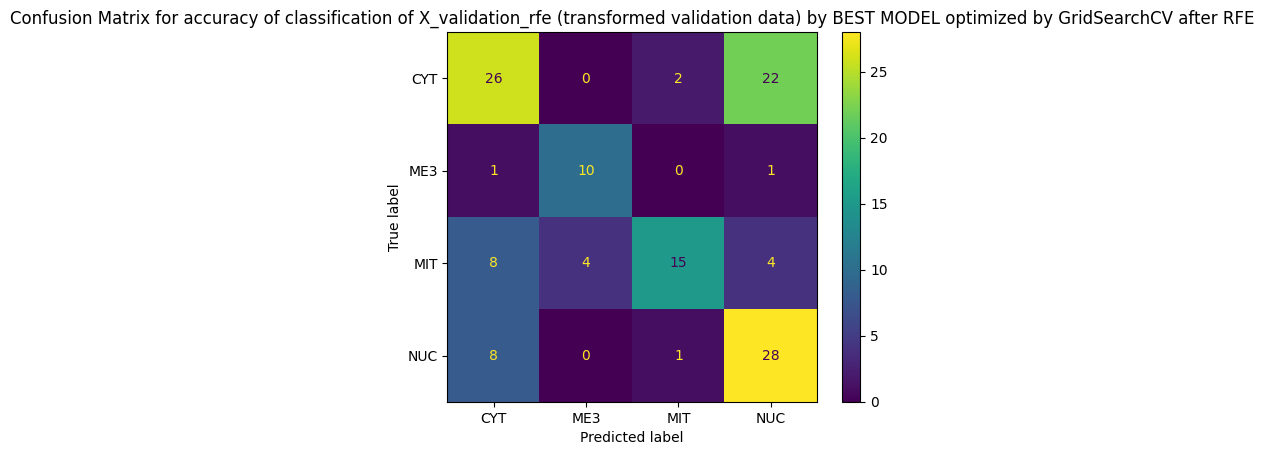

Classification Report (Best Model optimized by GridSearchCV after RFE - Validation Set):
              precision    recall  f1-score   support

         CYT       0.60      0.52      0.56        50
         ME3       0.71      0.83      0.77        12
         MIT       0.83      0.48      0.61        31
         NUC       0.51      0.76      0.61        37

    accuracy                           0.61       130
   macro avg       0.67      0.65      0.64       130
weighted avg       0.64      0.61      0.61       130



In [33]:
from sklearn.feature_selection import RFECV

# Optimizing model further (after hyperparameter tuning using GridSearchCV) via feature selection using Recursive Feature Elimination (RFE) –– 2nd tuned model, NO FURTHER IMPROVEMENTS 
select_best_features = RFECV(best_model, step=1, cv=stratified_kfold, min_features_to_select=6)
X_train_rfe = select_best_features.fit_transform(X_train, y_train)

# Have the model trained on reduced training dataset only containing best features 
best_model.fit(X_train_rfe, y_train)

# Predict labels for the training data -- TRAINING ACCURACY of transformed training dataset  
train_pred_selector = best_model.predict(X_train_rfe)
best_model_rfe_accuracy = accuracy_score(y_train, train_pred_selector)
print("\nAccuracy of classification of X_train_rfe (transformed training data) by BEST MODEL optimized by GridSearchCV after RFE: %.2f" % (best_model_rfe_accuracy*100)) 

#Generate Confusion Matrix (2D array to evaluate accuracy of classification of transformed training data by BEST MODEL after RFE)
cm_best_model_rfe = confusion_matrix(y_train, train_pred_selector)
print("\nConfusion Matrix for accuracy of classification of X_train_rfe (transformed training data) by BEST MODEL optimized by GridSearchCV after RFE:\n", cm_best_model_rfe)

# Create ConfusionMatrixDisplay object. First argument: Confusion Matrix, Second argument: Names of target classes 
cm_best_model_disp = ConfusionMatrixDisplay(confusion_matrix=cm_best_model_rfe, display_labels=variety)
# Plot values of Confusion Matrix against corresponding target classes.
cm_best_model_disp.plot()
#Display all open figures
plt.title("Confusion Matrix for accuracy of classification of X_train_rfe (transformed training data) by BEST MODEL optimized by GridSearchCV after RFE")
plt.show() 

# Further testing
# Predict labels for the validation data -- VALIDATION ACCURACY of transformed validation dataset
X_validation_rfe = select_best_features.transform(X_validation) 
train_pred_selector2 = best_model.predict(X_validation_rfe)
best_model_rfe_accuracy = accuracy_score(y_validation, train_pred_selector2)
print("\nAccuracy of classification of X_validation_rfe (transformed validation data) by BEST MODEL optimized by GridSearchCV after RFE: %.2f" % (best_model_rfe_accuracy*100)) 

#Generate Confusion Matrix (2D array to evaluate accuracy of classification of transformed training data by BEST MODEL after RFE)
cm_best_model_rfe = confusion_matrix(y_validation, train_pred_selector2)
print("\nConfusion Matrix for accuracy of classification of X_validation_rfe (transformed validation data) by BEST MODEL optimized by GridSearchCV after RFE:\n", cm_best_model_rfe)

# Create ConfusionMatrixDisplay object. First argument: Confusion Matrix, Second argument: Names of target classes
cm_best_model_disp = ConfusionMatrixDisplay(confusion_matrix=cm_best_model_rfe, display_labels=variety)
# Plot values of Confusion Matrix against corresponding target classes.
cm_best_model_disp.plot()
#Display all open figures
plt.title("Confusion Matrix for accuracy of classification of X_validation_rfe (transformed validation data) by BEST MODEL optimized by GridSearchCV after RFE")
plt.show()


# Display classification reports for BEST MODEL optimized by GridSearchCV after RFE
print("Classification Report (Best Model optimized by GridSearchCV after RFE - Validation Set):")
print(classification_report(y_validation, train_pred_selector2, target_names=variety)) 

Hyperparameter tuning with RandomSearch

In [35]:
# Hyperparameter tuning starting from BASELINE MODEL with RandomizedSearchCV - first test
param_dist = {
    'ccp_alpha': uniform(0, 0.001),
    'criterion': ['gini', 'entropy'],
    'max_depth': randint(55, 60),
    'max_features': [None, 'sqrt', 'log2'],
    'max_leaf_nodes': randint(20, 40),
    'min_impurity_decrease': uniform(0, 0.1),
    'min_samples_leaf': randint(25, 30),
    'min_samples_split': randint(60, 90),
    'min_weight_fraction_leaf': uniform(0, 0.1),
    'random_state': [42]
}

# Final Hyperparameter tuning
param_dist2 = {
    'ccp_alpha': [0.01], # higher than 0.1 and scores go down
    'criterion': ['entropy'],
    'max_depth': [45],
    'max_features': [None, 'sqrt'], # performance is better without 'log2'
    'max_leaf_nodes': [None], # limiting maximum leaf nodes reduces performance
    'min_impurity_decrease': [0.0],
    'min_samples_leaf': [1],
    'min_samples_split': [2],
    'min_weight_fraction_leaf': [0.0],
    'random_state': [42]
}

# Testing parameters
param_dist3 = {
    'ccp_alpha': [0.01],
    'criterion': ['entropy'],
    'max_depth': [45],
    'max_features': [None, 'sqrt'],
    'max_leaf_nodes': [5, 15, 25, 35],
    'min_impurity_decrease': [0.0],
    'min_samples_leaf': [2, 3, 5, 7],
    'min_samples_split': [50],
    'min_weight_fraction_leaf': [0.005, 0.05],
    'random_state': [42]
}


param_distributions_list = [param_dist, param_dist2, param_dist3] 

# Define a threshold for overfitting (difference between training and validation accuracy)
overfit_threshold = 10.0  # Example: 5%

# Initialize variables to track best RandomizedSearchCV results
best_random_accuracy = 0
#best_random_params = None
#best_random_search = None

print("\n" + "=" * 50)
print("Starting RandomizedSearchCV...")
print("=" * 50)


# Perform RandomizedSearchCV for each parameter distribution
for i, param_distributions in enumerate(param_distributions_list):
    print(f"\nStarting RandomizedSearchCV with Parameter Distribution {i + 1}")
    print("-" * 50) 
    
    # Initialize RandomizedSearchCV. Generates the different combinations of hyperparameters from param_grid. 
    random_search = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions=param_distributions, n_iter=30, cv=stratified_kfold, refit=True, verbose=0, n_jobs=-1, random_state=42) 
    
    # Fit RandomizedSearchCV
    random_search.fit(X_train, y_train)
    
    # Get the best model 
    best_random_search = random_search.best_estimator_
    
    # Calculate training accuracy
    train_pred_random = best_random_search.predict(X_train)
    training_accuracy_random = accuracy_score(y_train, train_pred_random)
  #  print(f"\nRandomizedSearchCV Best Model Training Accuracy: {training_accuracy_random * 100:.2f}%")
    
    # Calculate validation accuracy
    y_validate_pred_random = best_random_search.predict(X_validation)
    validation_accuracy_random = accuracy_score(y_validation, y_validate_pred_random)
    
    # Calculate the difference between training and validation accuracy
    accuracy_difference = training_accuracy_random - validation_accuracy_random
    
    # Print metrics
    print(f"Validation Accuracy: {validation_accuracy_random * 100:.2f}%\n")
    print(f"Training Accuracy: {training_accuracy_random * 100:.2f}%\n")
    print(f"Accuracy Difference: {accuracy_difference * 100:.2f}%\n")
    print(f"\nThis is the best combination of hyperparameters within Parameter Distribution {i + 1}:", random_search.best_params_) 
    print("-" * 50)
    
    # Condition to select the best model:
    # 1. Higher validation accuracy
    # 2. Low accuracy difference (below threshold to avoid overfitting)
    if (validation_accuracy_random > best_random_accuracy) and (accuracy_difference <= overfit_threshold):
        best_random_accuracy = validation_accuracy_random
        best_model_random = best_random_search
        best_random_params = random_search.best_params_

if best_random_accuracy > baseline_accuracy:
    print()
    print("=" * 50)
    print(f"Best RandomizedSearchCV Tuned Model Validation Accuracy: {best_random_accuracy * 100:.2f}%\n")
    print("This tuned model performs better than the baseline model!\n")

else:
    print()
    print("=" * 50)
    print("The RandomizedSearchCV tuned model did not outperform the baseline model.\n")
    print(f"Baseline Validation Accuracy: {baseline_accuracy * 100:.2f}%\n")
    print(f"Best RandomizedSearchCV Tuned Model Accuracy: {best_random_accuracy * 100:.2f}%\n")

# Initialize GridSearchCV. Generates the different combinations of hyperparameters from param_grid. It also refits the model (refit=True) with the best combination of hyperparameters using the entire training dataset after training and testing of all possible combinations of hyperparameters is completed and the best combination has been identified. 
random_search = RandomizedSearchCV(DecisionTreeClassifier(), param_dist2, refit=True, cv=stratified_kfold, verbose=0, n_jobs=-1, random_state=42) 

# Trains the model using the different combinations of hyperparameters, training the model once per combination. It also tests the different combinations of hyperparameters/different models trained with different hyperparameters for the best using cross-validation –– it evaluates the performance of models trained with different hyperparameters combinations to find the best one by using the n-1 fold that was not used in training as a validation dataset for evaluating performance.  
random_search.fit(X_train, y_train)

# The combination of parameters that resulted in the model with highest performance.
best_hyperparameters_random = random_search.best_params_ 
print("\nThis is the combination of hyperparameters in best model optimized by RandomizedSearchCV (i.e. best combination of hyperparameters across all Parameter Distributions):\n", best_hyperparameters_random) 

# This is the best model, automatically retrained with the combination of hyperparameters from param_grid that gives the best results after this are evaluated and identified
best_model_random = random_search.best_estimator_
print("\nThis is the best model optimized by RandomizedSearchCV:\n", best_model_random) 

# Average of the accuracy of classification of the n-1 fold not used in training by the best model across all folds.
best_model_accuracy_validation_fold = random_search.best_score_
print("\nThis is the average accuracy of classification of the n-1 fold across folds (RandomizedSearchCV): %.2f" % (best_model_accuracy_validation_fold*100)) 




Starting RandomizedSearchCV...

Starting RandomizedSearchCV with Parameter Distribution 1
--------------------------------------------------
Validation Accuracy: 56.92%

Training Accuracy: 61.50%

Accuracy Difference: 4.57%


This is the best combination of hyperparameters within Parameter Distribution 1: {'ccp_alpha': 0.0002517822958253642, 'criterion': 'entropy', 'max_depth': 57, 'max_features': None, 'max_leaf_nodes': 24, 'min_impurity_decrease': 0.028484049437746763, 'min_samples_leaf': 25, 'min_samples_split': 86, 'min_weight_fraction_leaf': 0.06095643339798969, 'random_state': 42}
--------------------------------------------------

Starting RandomizedSearchCV with Parameter Distribution 2
--------------------------------------------------
Validation Accuracy: 61.54%

Training Accuracy: 68.32%

Accuracy Difference: 6.78%


This is the best combination of hyperparameters within Parameter Distribution 2: {'random_state': 42, 'min_weight_fraction_leaf': 0.0, 'min_samples_split': 2, 

C:\Users\Aram\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 2 is smaller than n_iter=30. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\Aram\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Accuracy of classification of TRAINING DATA by BEST MODEL optimized by RandomizedSearchCV: 68.32%

Confusion Matrix for the performance of the BEST MODEL optimized by RandomizedSearchCV on the TRAINING DATASET:
 [[221   7  17  75]
 [  3 115   2   4]
 [ 42   7 103  11]
 [ 87  16  17 182]]


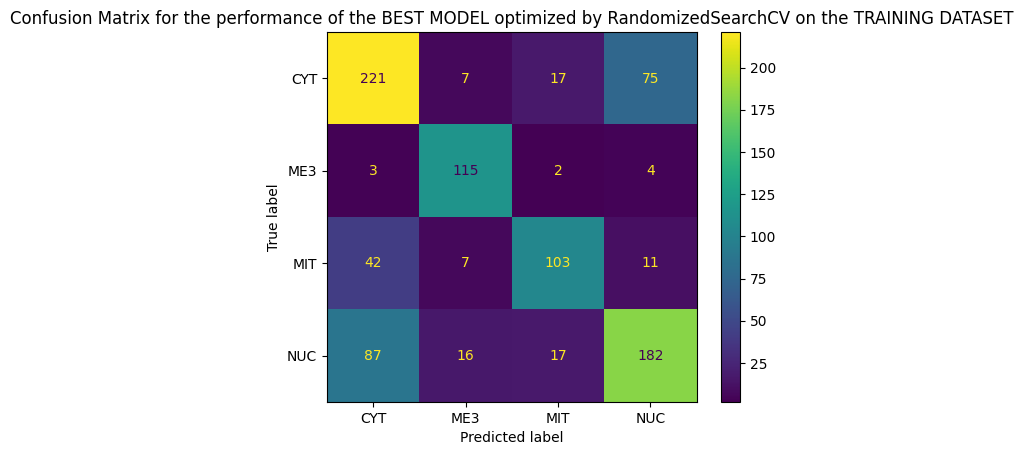


Accuracy of classification of VALIDATION DATA by BEST MODEL optimized by RandomizedSearchCV: 61.54%

Confusion Matrix for the performance of the BEST MODEL optimized by RandomizedSearchCV on the VALIDATION DATASET:
 [[28  0  2 20]
 [ 1 10  0  1]
 [10  4 15  2]
 [10  0  0 27]]


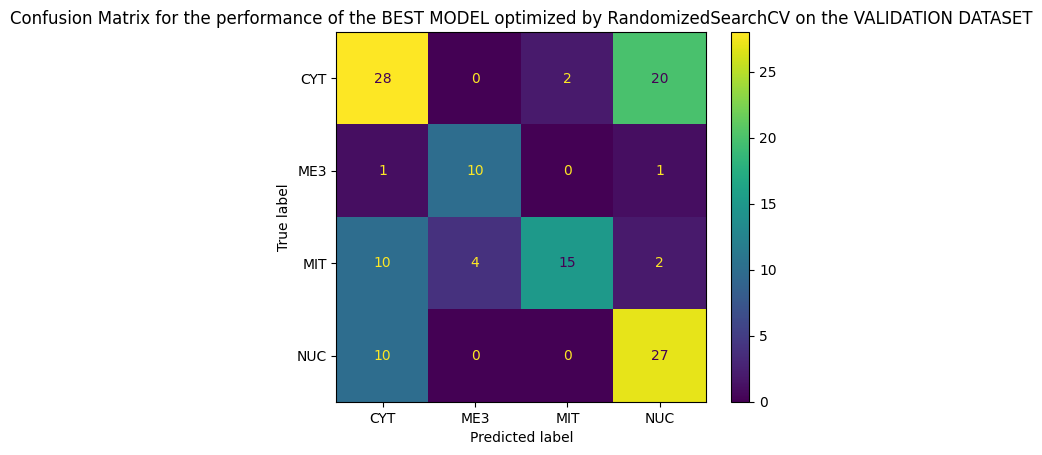

In [36]:
# TRAINING ACCURACY for the BEST MODEL RandomizedSearchCV
train_pred_best_model = best_model_random.predict(X_train)
best_model_training_accuracy = accuracy_score(y_train, train_pred_best_model)
print("\nAccuracy of classification of TRAINING DATA by BEST MODEL optimized by RandomizedSearchCV: %.2f%%" % (best_model_training_accuracy * 100))

# Confusion Matrix for training data
cm_best_model_training = confusion_matrix(y_train, train_pred_best_model)
print("\nConfusion Matrix for the performance of the BEST MODEL optimized by RandomizedSearchCV on the TRAINING DATASET:\n", cm_best_model_training)

cm_best_model_training_disp = ConfusionMatrixDisplay(confusion_matrix=cm_best_model_training, display_labels=variety)
cm_best_model_training_disp.plot()
plt.title("Confusion Matrix for the performance of the BEST MODEL optimized by RandomizedSearchCV on the TRAINING DATASET")
plt.show()

# VALIDATION ACCURACY for the BEST MODEL RandomizedSearchCV
val_pred_best_model_random = best_model_random.predict(X_validation)
best_model_accuracy = accuracy_score(y_validation, val_pred_best_model_random)
print("\nAccuracy of classification of VALIDATION DATA by BEST MODEL optimized by RandomizedSearchCV: %.2f%%" % (best_model_accuracy * 100))

cm_best_model = confusion_matrix(y_validation, val_pred_best_model_random)
print("\nConfusion Matrix for the performance of the BEST MODEL optimized by RandomizedSearchCV on the VALIDATION DATASET:\n", cm_best_model)

cm_best_model_disp = ConfusionMatrixDisplay(confusion_matrix=cm_best_model, display_labels=variety)
cm_best_model_disp.plot()
plt.title("Confusion Matrix for the performance of the BEST MODEL optimized by RandomizedSearchCV on the VALIDATION DATASET")
plt.show()



Accuracy of classification of X_train_rfe (transformed training data) by BEST MODEL optimized by RandomizedSearchCV after RFE: 68.32

Confusion Matrix for accuracy of classification of X_train_rfe (transformed training data) by BEST MODEL optimized by RandomizedSearchCV after RFE:
 [[221   7  17  75]
 [  3 115   2   4]
 [ 42   7 103  11]
 [ 87  16  17 182]]


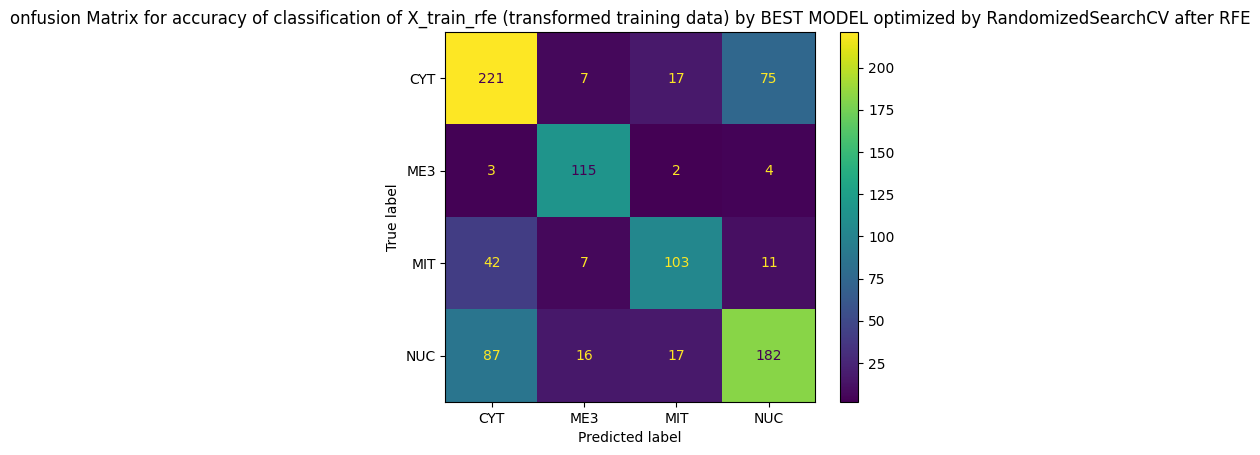


Accuracy of classification of X_validation_rfe (transformed validation data) by BEST MODEL optimized by RandomizedSearchCV after RFE: 61.54

Confusion Matrix for accuracy of classification of X_validation_rfe (transformed validation data) by BEST MODEL optimized by RandomizedSearchCV after RFE:
 [[28  0  2 20]
 [ 1 10  0  1]
 [10  4 15  2]
 [10  0  0 27]]


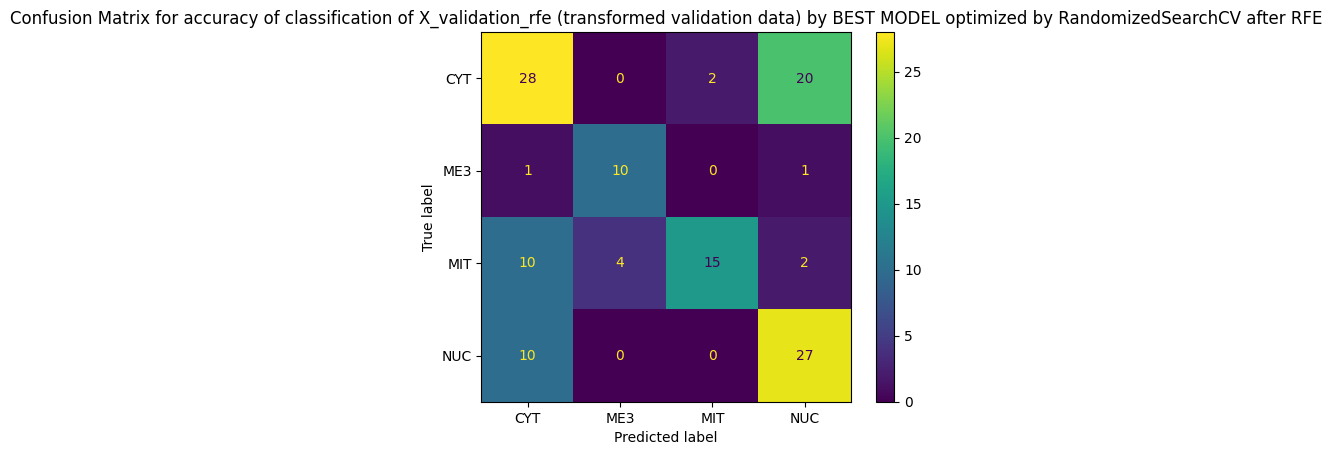

Classification Report (Best Model optimized by RandomizedSearchCV after RFE - Validation Set):
              precision    recall  f1-score   support

         CYT       0.57      0.56      0.57        50
         ME3       0.71      0.83      0.77        12
         MIT       0.88      0.48      0.62        31
         NUC       0.54      0.73      0.62        37

    accuracy                           0.62       130
   macro avg       0.68      0.65      0.65       130
weighted avg       0.65      0.62      0.61       130



In [37]:
# Optimizing model further (after hyperparameter tuning using GridSearchCV) via feature selection using Recursive Feature Elimination (RFE) –– 2nd tuned model, NO FURTHER IMPROVEMENTS 
select_best_features = RFECV(best_model_random, step=1, cv=stratified_kfold, min_features_to_select=6)
X_train_rfe = select_best_features.fit_transform(X_train, y_train)

# Have the model trained on reduced training dataset only containing best features 
best_model_random.fit(X_train_rfe, y_train)

# Predict labels for the training data -- TRAINING ACCURACY of transformed training dataset  
train_pred_selector = best_model_random.predict(X_train_rfe)
best_model_rfe_accuracy_random = accuracy_score(y_train, train_pred_selector)
print("\nAccuracy of classification of X_train_rfe (transformed training data) by BEST MODEL optimized by RandomizedSearchCV after RFE: %.2f" % (best_model_rfe_accuracy_random*100)) 

#Generate Confusion Matrix (2D array to evaluate accuracy of classification of transformed training data by BEST MODEL after RFE)
cm_best_model_rfe = confusion_matrix(y_train, train_pred_selector)
print("\nConfusion Matrix for accuracy of classification of X_train_rfe (transformed training data) by BEST MODEL optimized by RandomizedSearchCV after RFE:\n", cm_best_model_rfe)

# Create ConfusionMatrixDisplay object. First argument: Confusion Matrix, Second argument: Names of target classes 
cm_best_model_disp = ConfusionMatrixDisplay(confusion_matrix=cm_best_model_rfe, display_labels=variety)
# Plot values of Confusion Matrix against corresponding target classes.
cm_best_model_disp.plot()
#Display all open figures
plt.title("onfusion Matrix for accuracy of classification of X_train_rfe (transformed training data) by BEST MODEL optimized by RandomizedSearchCV after RFE")
plt.show() 

# Further testing
# Predict labels for the validation data -- VALIDATION ACCURACY of transformed validation dataset
X_validation_rfe = select_best_features.transform(X_validation) 
train_pred_selector2 = best_model_random.predict(X_validation_rfe)
best_model_rfe_accuracy_random = accuracy_score(y_validation, train_pred_selector2)
print("\nAccuracy of classification of X_validation_rfe (transformed validation data) by BEST MODEL optimized by RandomizedSearchCV after RFE: %.2f" % (best_model_rfe_accuracy_random*100)) 

#Generate Confusion Matrix (2D array to evaluate accuracy of classification of transformed training data by BEST MODEL after RFE)
cm_best_model_rfe = confusion_matrix(y_validation, train_pred_selector2)
print("\nConfusion Matrix for accuracy of classification of X_validation_rfe (transformed validation data) by BEST MODEL optimized by RandomizedSearchCV after RFE:\n", cm_best_model_rfe)

# Create ConfusionMatrixDisplay object. First argument: Confusion Matrix, Second argument: Names of target classes
cm_best_model_disp = ConfusionMatrixDisplay(confusion_matrix=cm_best_model_rfe, display_labels=variety)
# Plot values of Confusion Matrix against corresponding target classes.
cm_best_model_disp.plot()
#Display all open figures
plt.title("Confusion Matrix for accuracy of classification of X_validation_rfe (transformed validation data) by BEST MODEL optimized by RandomizedSearchCV after RFE")
plt.show()


# Display classification reports for BEST MODEL optimized by RandomizedSearchCV after RFE
print("Classification Report (Best Model optimized by RandomizedSearchCV after RFE - Validation Set):")
print(classification_report(y_validation, train_pred_selector2, target_names=variety)) 

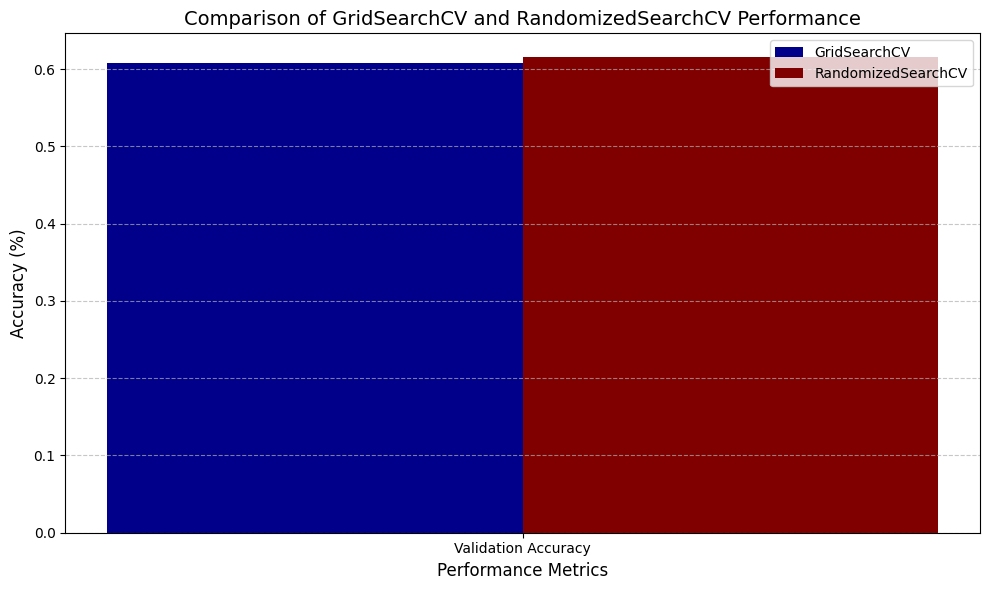

In [38]:
# Bar chart comparing the accuracy between GridSearch and RandomizedSearch respectively
def barChartComparison(best_model_rfe_accuracy, best_model_rfe_accuracy_random):

    # Print Results of validation and test set performance from both gridsearch and randomizedsearch
   # print("\n=== Validation and Test Performance ===")
   # print(f"GridSearchCV Validation Accuracy: {best_model_rfe_accuracy * 100:.2f}%")
   # print(f"RandomizedSearchCV Validation Accuracy: {best_model_rfe_accuracy_random * 100:.2f}%")

    # Prepare Data for Bar Chart
    metrics = ["Validation Accuracy"]
    grid_accuracies = [best_model_rfe_accuracy]
    random_accuracies = [best_model_rfe_accuracy_random]

    # Plotting the bar chart
    x = range(len(metrics))
    width = 0.35  # Width of the bars

    plt.figure(figsize=(10, 6))
    plt.bar(x, grid_accuracies, width=width, label="GridSearchCV", color="darkblue")
    plt.bar([i + width for i in x], random_accuracies, width=width, label="RandomizedSearchCV", color="maroon")

    # labels and legend for the bar chart
    plt.title("Comparison of GridSearchCV and RandomizedSearchCV Performance", fontsize=14)
    plt.xlabel("Performance Metrics", fontsize=12)
    plt.ylabel("Accuracy (%)", fontsize=12)
    plt.xticks([i + width / 2 for i in x], metrics)  # Center the ticks
    plt.legend()
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()

    # Show Plot
    plt.show()


# Calling the function 
barChartComparison(best_model_rfe_accuracy, best_model_rfe_accuracy_random) 



Accuracy of classification of TESTING DATA by BEST MODEL DecisionTree (that optimized with RandomizedSearchCV): 60.38

Confusion Matrix for the DecisionTree BEST MODEL's performance on the TESTING DATASET (that optimized with RandomizedSearchCV) (values within the array):
 [[61  0  8 24]
 [ 2 23  0  2]
 [17  3 23  7]
 [28  4  8 50]]


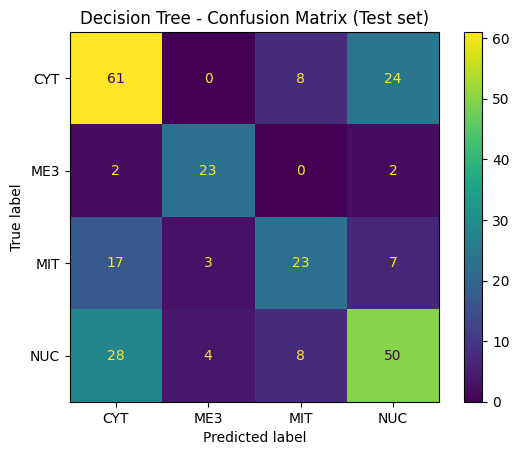

Classification Report of DecisionTree Best Model (that optimized by RandomizedSearchCV after RFE) - Testing Set:
              precision    recall  f1-score   support

         CYT       0.56      0.66      0.61        93
         ME3       0.77      0.85      0.81        27
         MIT       0.59      0.46      0.52        50
         NUC       0.60      0.56      0.58        90

    accuracy                           0.60       260
   macro avg       0.63      0.63      0.63       260
weighted avg       0.60      0.60      0.60       260



In [39]:
# TESTING ACCURACY for the BEST MODEL –– that optimized with RandomizedSearchCV.
#Predict labels for the testing data 
X_test_rfe = select_best_features.transform(X_test) 
test_pred_best_model = best_model_random.predict(X_test_rfe)

#Calculate accuracy of classification of testing data (Is the model overfitting? Compare to accuracy of classification of training data)
best_model_testing_accuracy = accuracy_score(y_test, test_pred_best_model)
print("\nAccuracy of classification of TESTING DATA by BEST MODEL DecisionTree (that optimized with RandomizedSearchCV): %.2f" % (best_model_testing_accuracy*100)) 

#Generate Confusion Matrix (2D array to evaluate accuracy of classification of testing data by BEST MODEL)
cm_best_model_testing = confusion_matrix(y_test, test_pred_best_model)
print("\nConfusion Matrix for the DecisionTree BEST MODEL's performance on the TESTING DATASET (that optimized with RandomizedSearchCV) (values within the array):\n", cm_best_model_testing)

# Create ConfusionMatrixDisplay object. First argument: Confusion Matrix, Second argument: Names of target classes
cm_best_model_testing_disp = ConfusionMatrixDisplay(confusion_matrix=cm_best_model_testing, display_labels=variety)
# Plot values of Confusion Matrix against corresponding target classes.
cm_best_model_testing_disp.plot()
plt.title("Decision Tree - Confusion Matrix (Test set)")
#Display all open figures
plt.show()

# Display classification reports for BEST MODEL optimized by RandomizedSearchCV after RFE TEST SET (i.e. best model overall)
print("Classification Report of DecisionTree Best Model (that optimized by RandomizedSearchCV after RFE) - Testing Set:")
print(classification_report(y_test, test_pred_best_model, target_names=variety)) 


DECISION TREE that is the BEST MODEL overall (that optimized by RandomizedSearchCV after RFE):



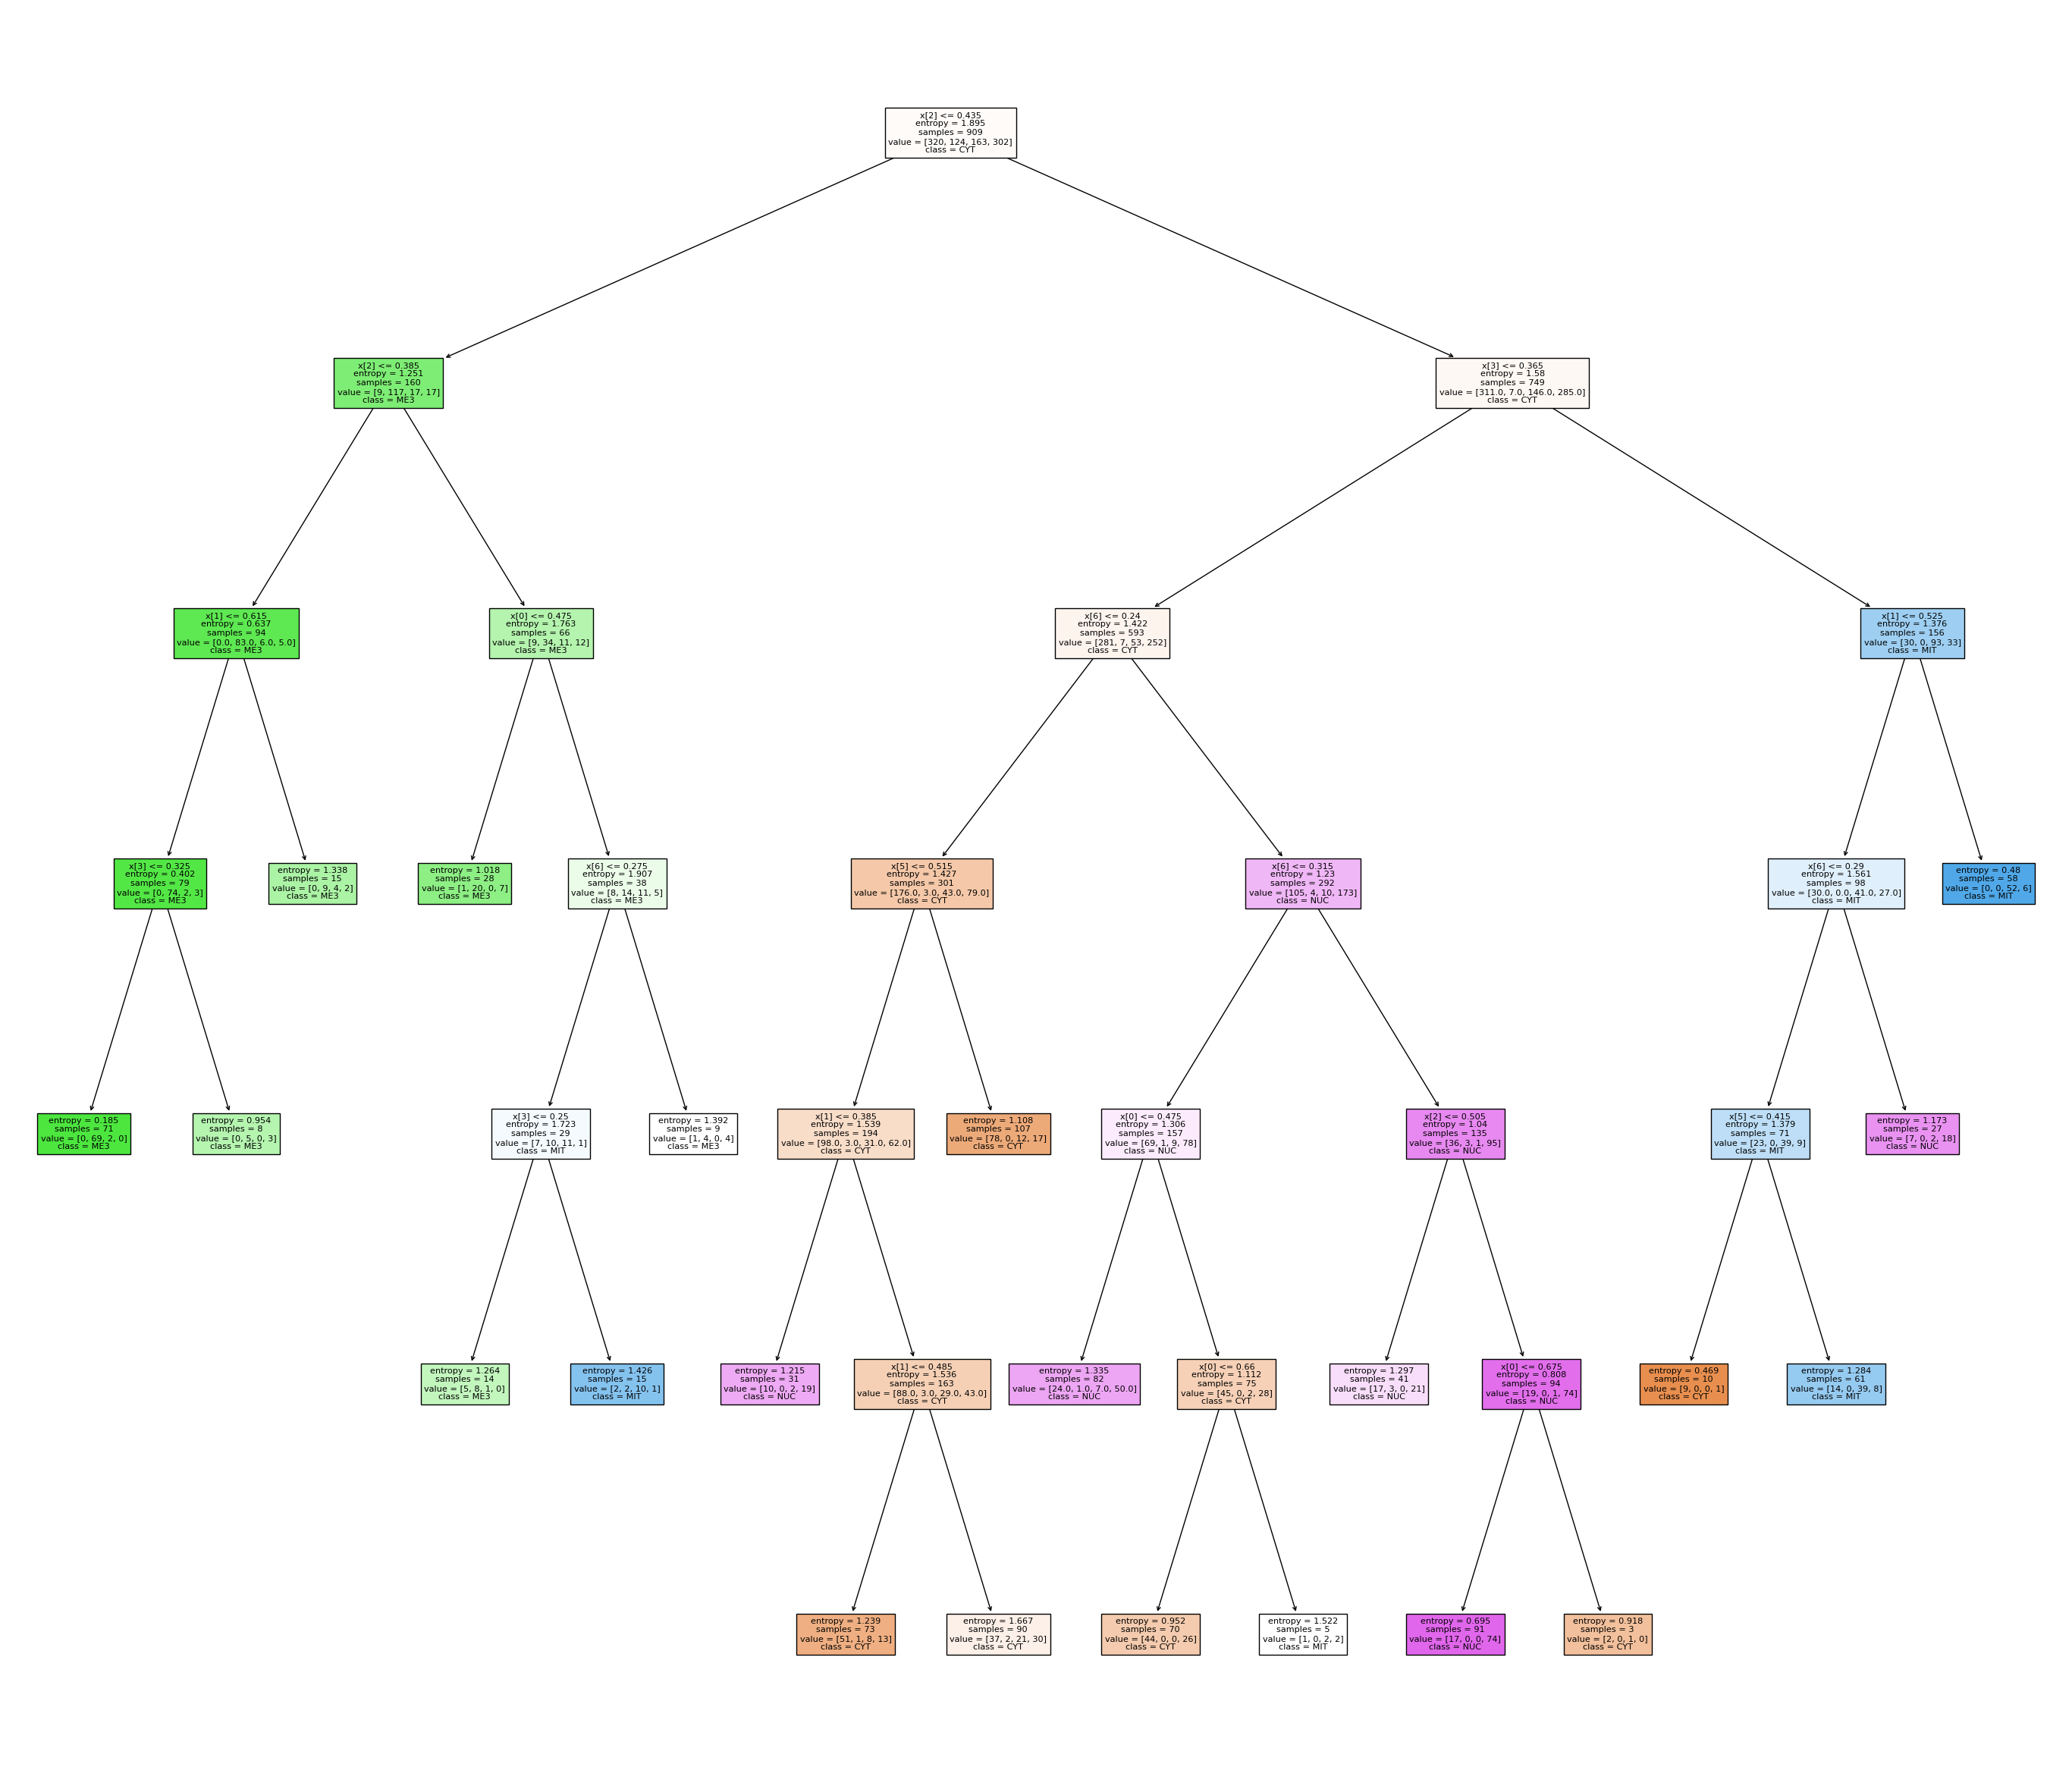

In [40]:
from sklearn.tree import plot_tree 

# Plot the tree that is the best model 
print("\nDECISION TREE that is the BEST MODEL overall (that optimized by RandomizedSearchCV after RFE):\n")
plt.figure(figsize=(35, 30))
plot_tree(best_model_random, class_names=variety, filled=True)
plt.show() 

In [41]:
# Bar chart comparing the accuracy between SVM and Decision Tree
def barChart_Accuracy_Comparison(best_model_svm_acc, best_model_dTree_acc):

    # Print Results of validation and test set performance from both gridsearch and randomizedsearch
    print("\n=== Test Performance ===")
    print(f"SVM Test Accuracy: {best_model_svm_acc * 100:.2f}%")
    print(f"Decision Tree Test Accuracy: {best_model_dTree_acc * 100:.2f}%")
    
    # Prepare Data for Bar Chart
    metrics = ["Test Set Accuracy"]
    #grid_accuracies = [best_model_rfe_accuracy]
    #random_accuracies = [best_model_rfe_accuracy_random]

    # Plotting the bar chart
    x = range(len(metrics))
    width = 0.35  # Width of the bars

    plt.figure(figsize=(10, 6))
    plt.bar(x, best_model_svm_acc, width=width, label="SVM", color="darkblue")
    plt.bar([i + width for i in x], best_model_dTree_acc, width=width, label="Decision Tree", color="maroon")

    # labels and legend for the bar chart
    plt.title("Comparison of SVM and Decision Tree Performance", fontsize=14)
    plt.xlabel("Performance Metrics", fontsize=12)
    plt.ylabel("Accuracy (%)", fontsize=12)
    plt.xticks([i + width / 2 for i in x], metrics)  # Center the ticks
    plt.legend()
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()

    # Show Plot
    plt.show()


=== Test Performance ===
SVM Test Accuracy: 66.54%
Decision Tree Test Accuracy: 60.38%


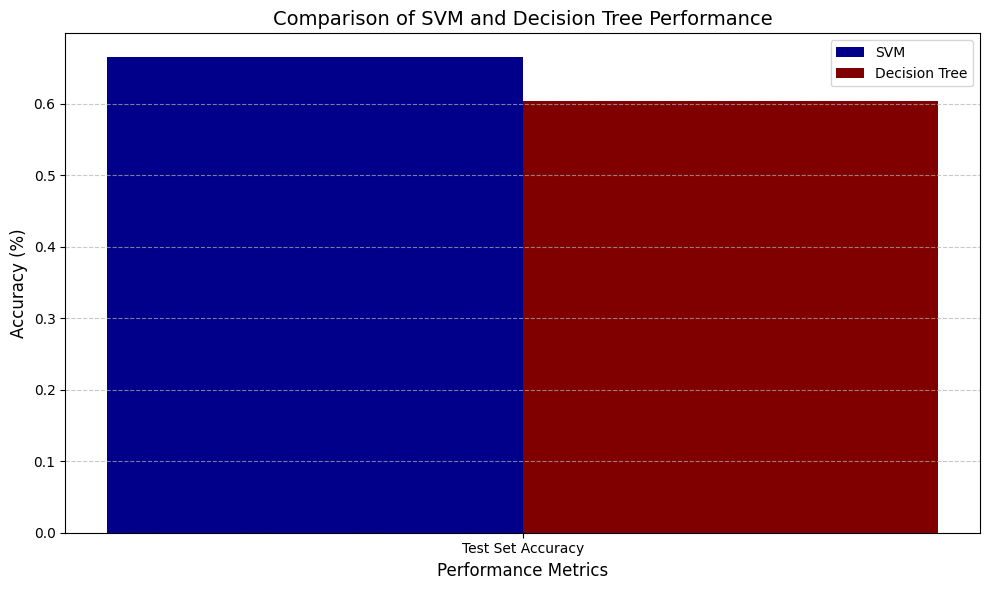

In [42]:
barChart_Accuracy_Comparison(best_model_testing_accuracy_svm, best_model_testing_accuracy)